In [384]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [385]:
import warnings
warnings.filterwarnings('ignore')

In [586]:
pd.set_option('display.max_rows', 100)

In [386]:
df = pd.read_excel('Hotel_Res_Github.xlsx')

In [387]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07 00:00:00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07 00:00:00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07 00:00:00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07 00:00:00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07 00:00:00


In [388]:
df.shape

(119390, 32)

In [389]:
### Checking if the target variable is imbalanced or not

In [390]:
df['is_canceled'].value_counts()/len(df)  ### We can see that our target variable is quite balanced

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [391]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [392]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [590]:
df[df.duplicated()]   ###31994 rows are duplicates

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07 00:00:00
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07 00:00:00
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07 00:00:00
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-01-07 00:00:00
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-08-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-03-09 00:00:00
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09 00:00:00
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09 00:00:00
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-03-09 00:00:00


In [396]:
data = df.copy()

### Dropping Duplicate Rows

In [397]:
data.drop_duplicates(keep='first',inplace=True)

In [398]:
data.shape

(87396, 32)

In [401]:
data['is_canceled'].value_counts()/len(data) ### Fter dropping the duplicates are target variable is now more imbalanced 
### than before

0    0.725102
1    0.274898
Name: is_canceled, dtype: float64

# Data Dictionary

### hotel	
Hotel Type	  
Subgroups : Resort Hotel,City Hotel	(Categorical)

### is_canceled	(Target Variable)
Value indicating if the booking was canceled   
Subgroups : (1) is cancelled,(0) is not cancelled	(Categorical)

### lead_time
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date	 (Integer)

### arrival_date_year
Year of arrival date	-	(Integer)

### arrival_date_month	
Month of arrival date with 12 categories  
Sugroups : “January” to “December”	(Categorical)

### arrival_date_week_number
Week number of the arrival date	-	(Integer)

### arrival_date_day_of_month
Day of the month of the arrival date	-	(Integer)

### stays_in_weekend_nights
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel	-	(Integer)

### stays_in_week_nights
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel	-	(Integer)

### adults	
Number of adults	-	(Integer)
### children
Number of children	-	(Integer)

### babies
Number of babies	-	(Integer)

### meal
Type of meal booked. Categories are presented in standard hospitality meal packages	
Subgroups : Undefined/SC – no meal package,
            BB – Bed & Breakfast,
            HB – Half board (breakfast and one other meal – usually dinner),
            FB – Full board (breakfast, lunch and dinner)	(Categorical)
            
### country
Country of origin. Categories are represented in the ISO 3155–3:2013 format	-	(Categorical)

### market_segment
Market segment designation 
Subgroups : “TA” = “Travel Agents”,“TO” = “Tour Operators”,'Direct','Corporate','Online TA','Offline TA/TO',
'Complementary','Groups','Undefined','Aviation'(Categorical)
            
TA/TO : Travel agents help individuals and groups plan and book their travel arrangements, while tour operators design and 
operate group tours and vacation packages.   

Aviation : Aviation in the market segment type refers to a specific type of customer segment that is associated with the airline industry.

This market segment may include guests who are airline crew members or passengers who require short-term accommodations near the airport due to flight delays, cancellations, or layovers. In addition, the aviation segment may also include guests who are attending aviation-related events, such as air shows or industry conferences.

Hotels that cater to the aviation market segment may offer services and amenities that are specifically tailored to the needs of these guests, such as shuttle services to and from the airport, flexible check-in and check-out times, and on-site amenities such as business centers and meeting rooms.

Complementary : Complementary in the market segment type refers to a specific type of customer segment that is associated with complimentary (free) hotel stays.

This market segment may include guests who are traveling for business purposes and are entitled to a complimentary stay as part of a corporate agreement or loyalty program. Alternatively, the complementary market segment may include guests who have won a complimentary stay through a hotel promotion or sweepstakes.

Hotels that cater to the complementary market segment may offer services and amenities that are tailored to these guests, such as upgraded room categories, personalized service, and exclusive experiences. These hotels may also prioritize guest satisfaction to ensure that guests who have received a complementary stay have a positive experience and are more likely to return as paying customers in the future.

Groups : This market segment may include guests who are traveling together for a specific purpose and require multiple rooms or larger event spaces. The group segment may also include guests who are traveling for leisure purposes, such as weddings, family reunions, or group vacations.

By providing services that meet the specific needs of group travelers, hotels can attract and retain group business and establish long-term relationships with event planners or tour operators.

                                       
### distribution_channel
Booking distribution channel 
Subgroups : “TA” = “Travel Agents”
            “TO” means “Tour Operators”	(Categorical)
                                         
### is_repeated_guest
Value indicating if the booking name was from a repeated guest 
Subgroups : (1) is repeated, (0) is not repeated	(Categorical)

### previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking	-	(Integer)

### previous_bookings_not_canceled
Number of previous bookings not cancelled by the customer prior to the current booking	-	(Integer)

### reserved_room_type
Code of room type reserved	Code is presented instead of designation for anonymity reasons	(Categorical)

### assigned_room_type	
Code for the type of room assigned to the booking.
Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons	
(Categorical)



### booking_changes
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS(PMS stands for Property Management System. In the hotel industry, a PMS is a software application that enables hotels to manage their day-to-day operations, including managing reservations, check-ins and check-outs, guest information, room allocations, billing, housekeeping, and more. The PMS serves as the central hub for managing all the hotel's operational tasks, and it integrates with other systems such as online booking engines, point of sale systems, and revenue management systems.) until the moment of check-in or cancellation	-	(Integer)

### deposit_type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories
Subgroups : No Deposit – no deposit was made,
            Non Refund – a deposit was made in the value of the total stay cost,
            Refundable – a deposit was made with a value under the total cost of stay
(Categorical)

### agent
ID of the travel agency that made the booking	-	(Categorical)

### company
ID of the company/entity that made the booking or responsible for paying the booking
#### Notes:ID is presented instead of designation for anonymity reasons	
(Categorical)

### days_in_waiting_list	
Number of days the booking was in the waiting list before it was confirmed to the customer	-	(Integer)

### customer_type
Type of booking, assuming one of four categories
Subgroups : Contract - when the booking has an allotment or other type of contract associated to it,
            Group – when the booking is associated to a group,
            Transient – when the booking is not part of a group or contract, and is not associated to other transient booking,
            Transient-party – when the booking is transient, but is associated to at least other transient booking
(Categorical)

### adr	
Average Daily Rate
Average Daily Rate (ADR) is a key performance metric used in the hotel industry to measure the average price that a hotel room is sold for per day. ADR is calculated by dividing the total room revenue generated by the number of rooms sold during a specific period of time, typically a day or a month.     (Numeric)

### required_car_parking_spaces
Number of car parking spaces required by the customer	-	(Integer)

### total_of_special_requests	
Number of special requests made by the customer (e.g. twin bed or high floor)	-	(Integer)

### reservation_status
Reservation last status, assuming one of three categories
Subgroups : Canceled – booking was canceled by the customer,
            Check-Out – customer has checked in but already departed,
            No-Show – customer did not check-in and did inform the hotel of the reason why
(Categorical)
### reservation_status_date
Date at which the last status was set	
This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel	(Date)

### Checking for inconsistencies in the data

#### Missing Value Treatement

In [402]:
(df.isnull().sum()/len(df))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

#### Since the data is from a portugese hotel/resort we can impute the nulls in the country columns with Portgual

In [403]:
data['country'].fillna(value=data['country'].mode()[0],inplace=True)

#### Since most customers did not have a child accompanying them, we can impute the nulls with 0s here

In [404]:
data['children'].fillna(0,inplace=True)

In [405]:
data[data['agent'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


#### From the above cell we can see that agent id is not zero for any row, so we can impute them with zero
#### Zero in the agent id will tell us that either this customer has booked the hotel room on his own or 
#### Agent id of the same customer is unknown

In [406]:
data['agent'].fillna(0,inplace=True)

In [407]:
data[data['company'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


#### Again, as we can see from above cell no company has id as 0, so we can impute them with zero
#### I am imputing them with zero as their might be a lot of cutsomers who have booked a room for recreational activities
#### instead of booking for a corporate event

In [408]:
data['company'].fillna(0,inplace=True)

### Data with no null values

In [412]:
(data.isnull().sum()/len(data))*100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

### Checking the unique values in each column

In [446]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [447]:
data['is_canceled'].unique()

array([0, 1], dtype=int64)

In [448]:
data['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99, 118,  95,  96,  69,
        45,  40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,
        76,   3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81,
       368, 364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,
        86,  52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,
        34,  27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,
        67,  55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,
        22,  91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58,
       116,  42, 321,  38,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [449]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [450]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [451]:
data['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26], dtype=int64)

In [452]:
data['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [453]:
data['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14],
      dtype=int64)

In [454]:
data['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41], dtype=int64)

In [455]:
data['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [456]:
data['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [457]:
data['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [458]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [459]:
data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [460]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [461]:
data['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [462]:
data['is_repeated_guest'].unique()

array([0, 1], dtype=int64)

In [463]:
data['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [464]:
data['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

In [465]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [466]:
data['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [467]:
data['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18], dtype=int64)

In [468]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [469]:
data['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [470]:
data['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [472]:
data['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36], dtype=int64)

In [473]:
data['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [474]:
data['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [475]:
data['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [476]:
data['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [477]:
data['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [478]:
data[['reservation_status_date']]

,reservation_status_date
0,2015-01-07 00:00:00
1,2015-01-07 00:00:00
2,2015-02-07 00:00:00
3,2015-02-07 00:00:00
4,2015-03-07 00:00:00
...,...
119385,2017-06-09 00:00:00
119386,2017-07-09 00:00:00
119387,2017-07-09 00:00:00
119388,2017-07-09 00:00:00


In [479]:
data[['company']].value_counts()

company
0.0        82137
40.0         851
223.0        503
45.0         238
153.0        206
           ...  
416.0          1
415.0          1
413.0          1
412.0          1
288.0          1
Length: 353, dtype: int64

### Changing dtypes of columns

In [480]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [481]:
data = data.astype({'is_canceled':'object',
                    'arrival_date_year':'object',
            'children':'int64',
            'is_repeated_guest':'object',
            'agent':'object',
            'company':'object',
            'reservation_status_date':'datetime64'})

In [483]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  object        
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  b

## Visualisations

### Uni-variate Analysis

In [484]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(exclude=np.number)

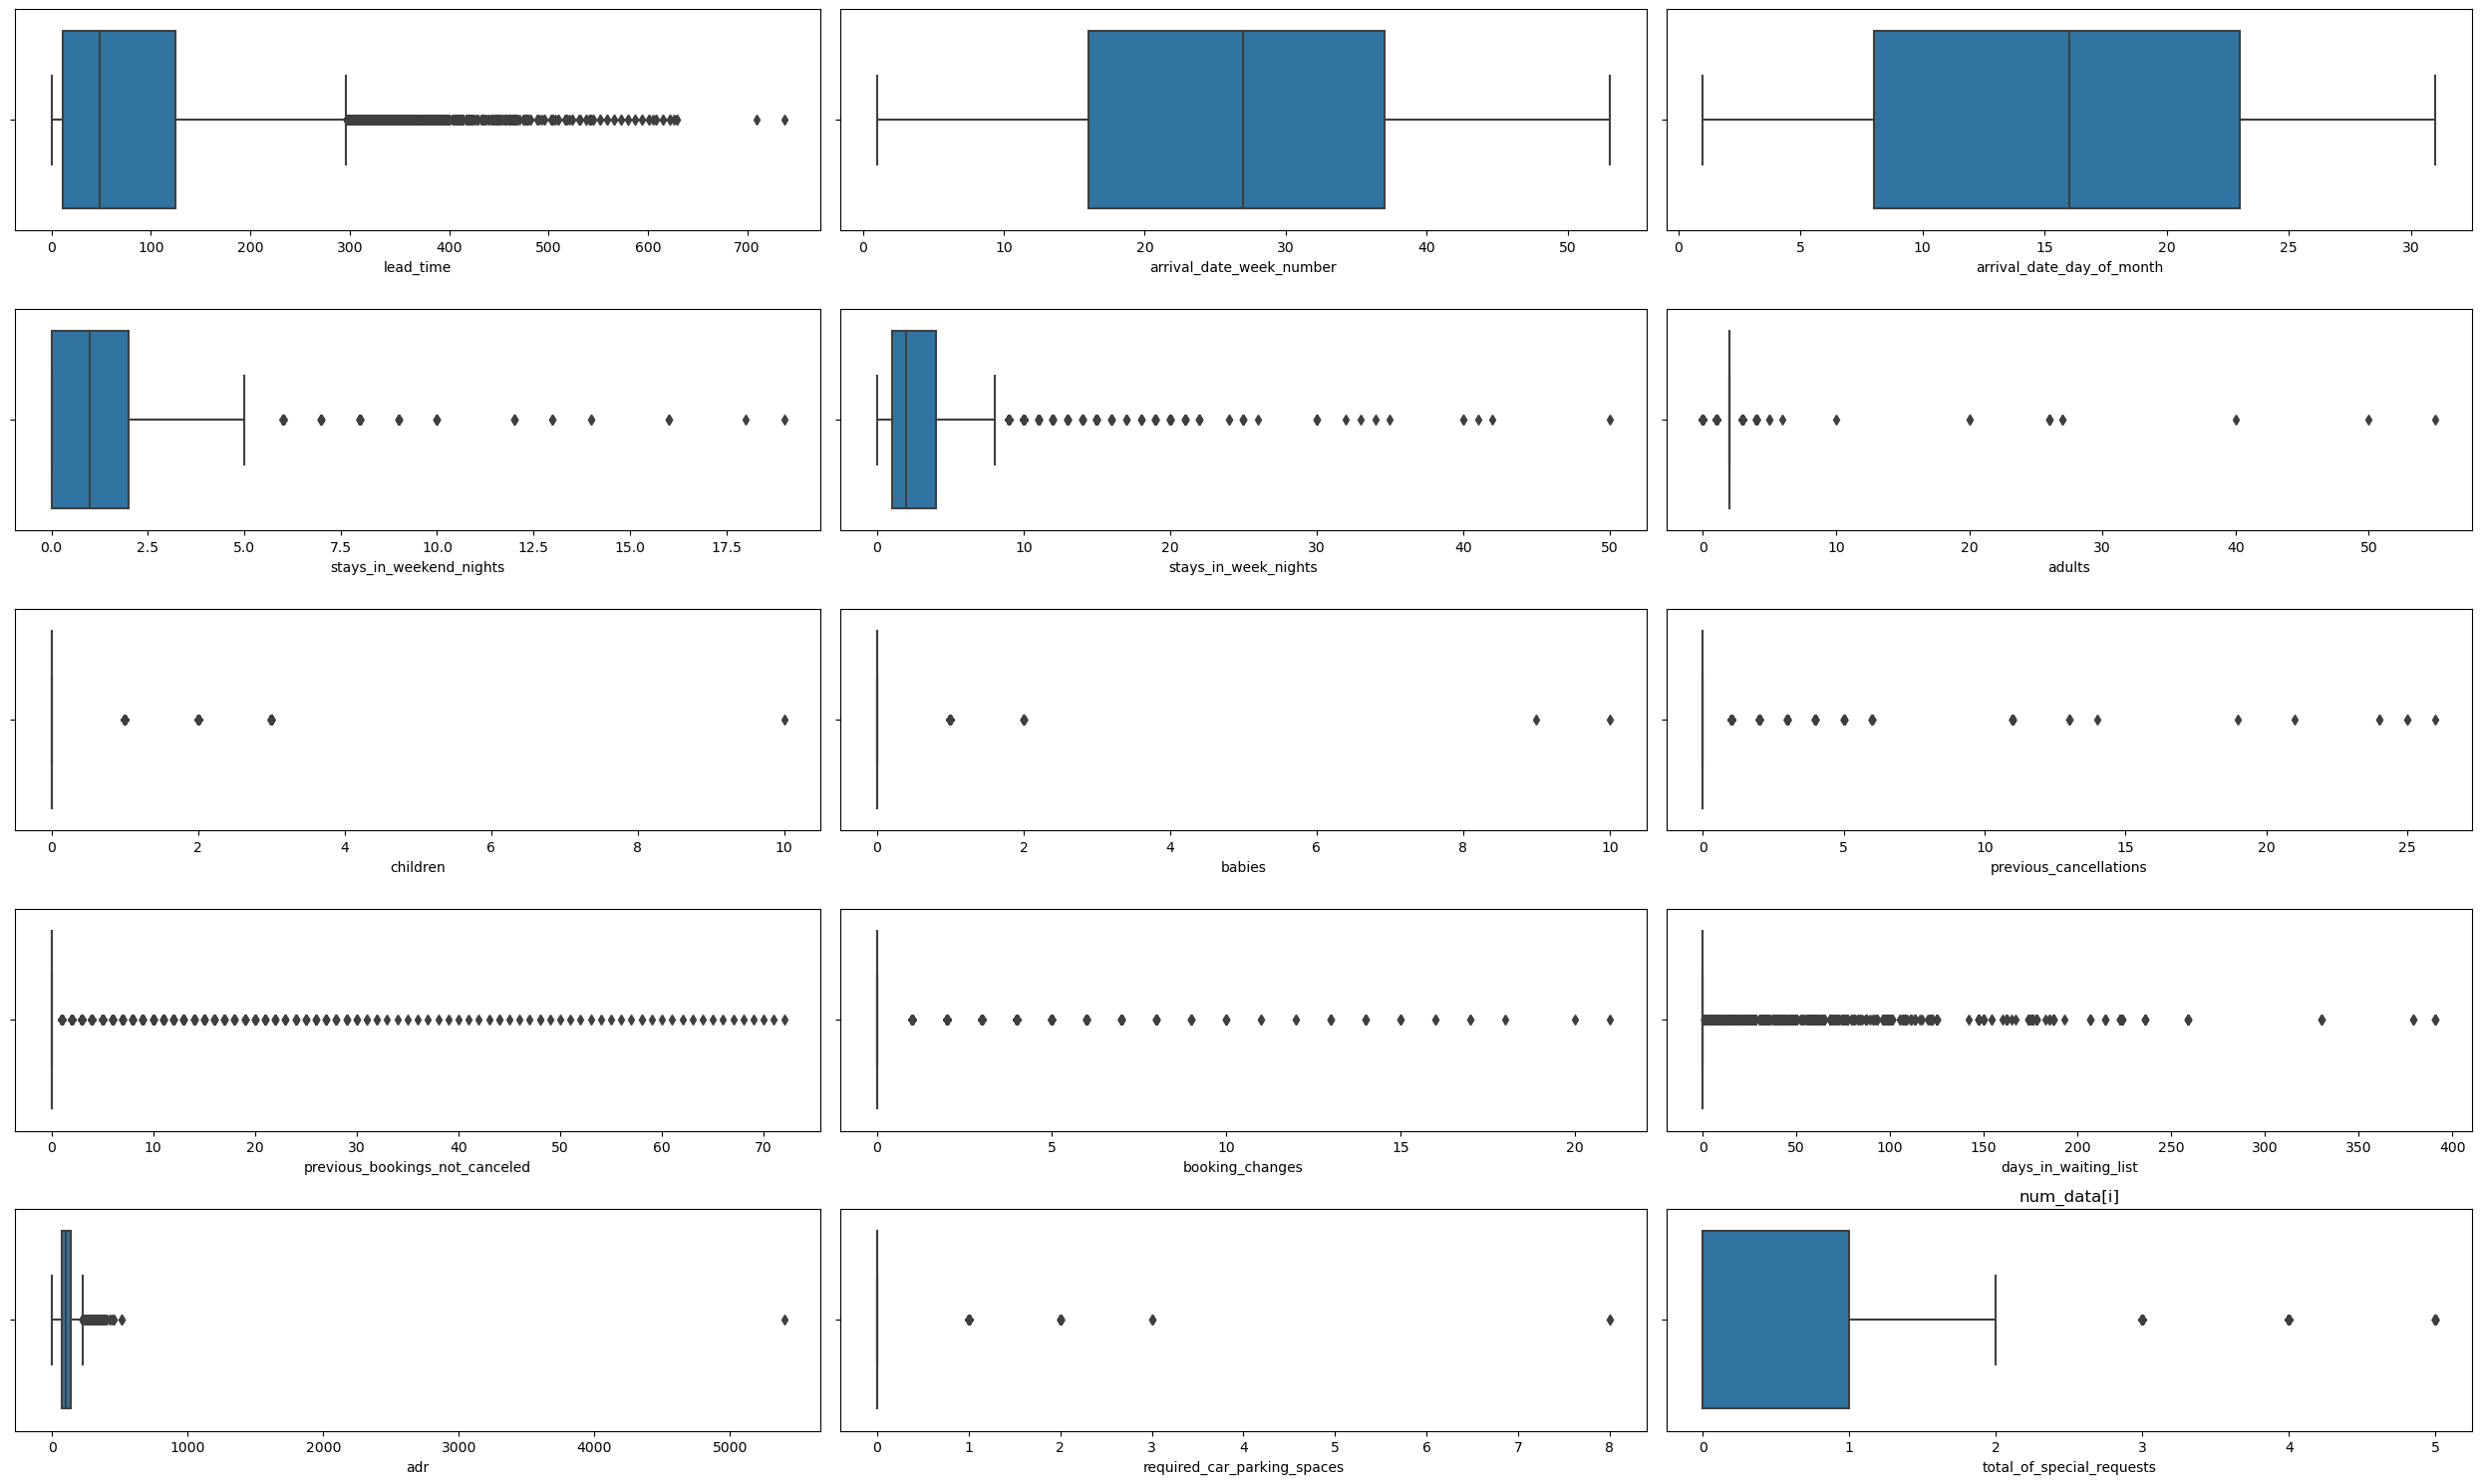

In [485]:
fig,ax = plt.subplots(5,3, figsize=(25,15))
for i,subplot in zip(num_data.columns,ax.flatten()):
    sns.boxplot(num_data[i],ax=subplot)
    plt.title('num_data[i]')
    
plt.tight_layout()
plt.show()

### From the above boxplots(apart from finding out the outliers) we find that:
#### 1. Median of lead time column is somewhere close to 40 days
#### 2. Alot of bookings are made from week numbers 17 to 38 which is understandable as these week numbers correspond to the start of Spring and end of Summer, respectively
#### 3. Most bookings are neither made at the beginning nor at the end of the month
#### 4. Their have been instances where a booking has comprised of more than 50 adults(this is probably a corporate event)
#### 5. Most tourists donot have children accompanying them but their have been instances where a booking comprised of 10 children
#### 6. Most tourists donot have babies accompanying them but their have been instances where a booking comprised of 10 babies
#### 7. Their have been instances when a customer has cancelled more than 25 bookings, in the past
#### 8. Their are customers whi have made more than 20 changes to the booking
#### 9. Though most of the bookings in the waiting list have been cleared in a day, their have been instances where a booking was in the waiting list for close to 400 days!
#### 10 Most customers at the most make only 1 special request

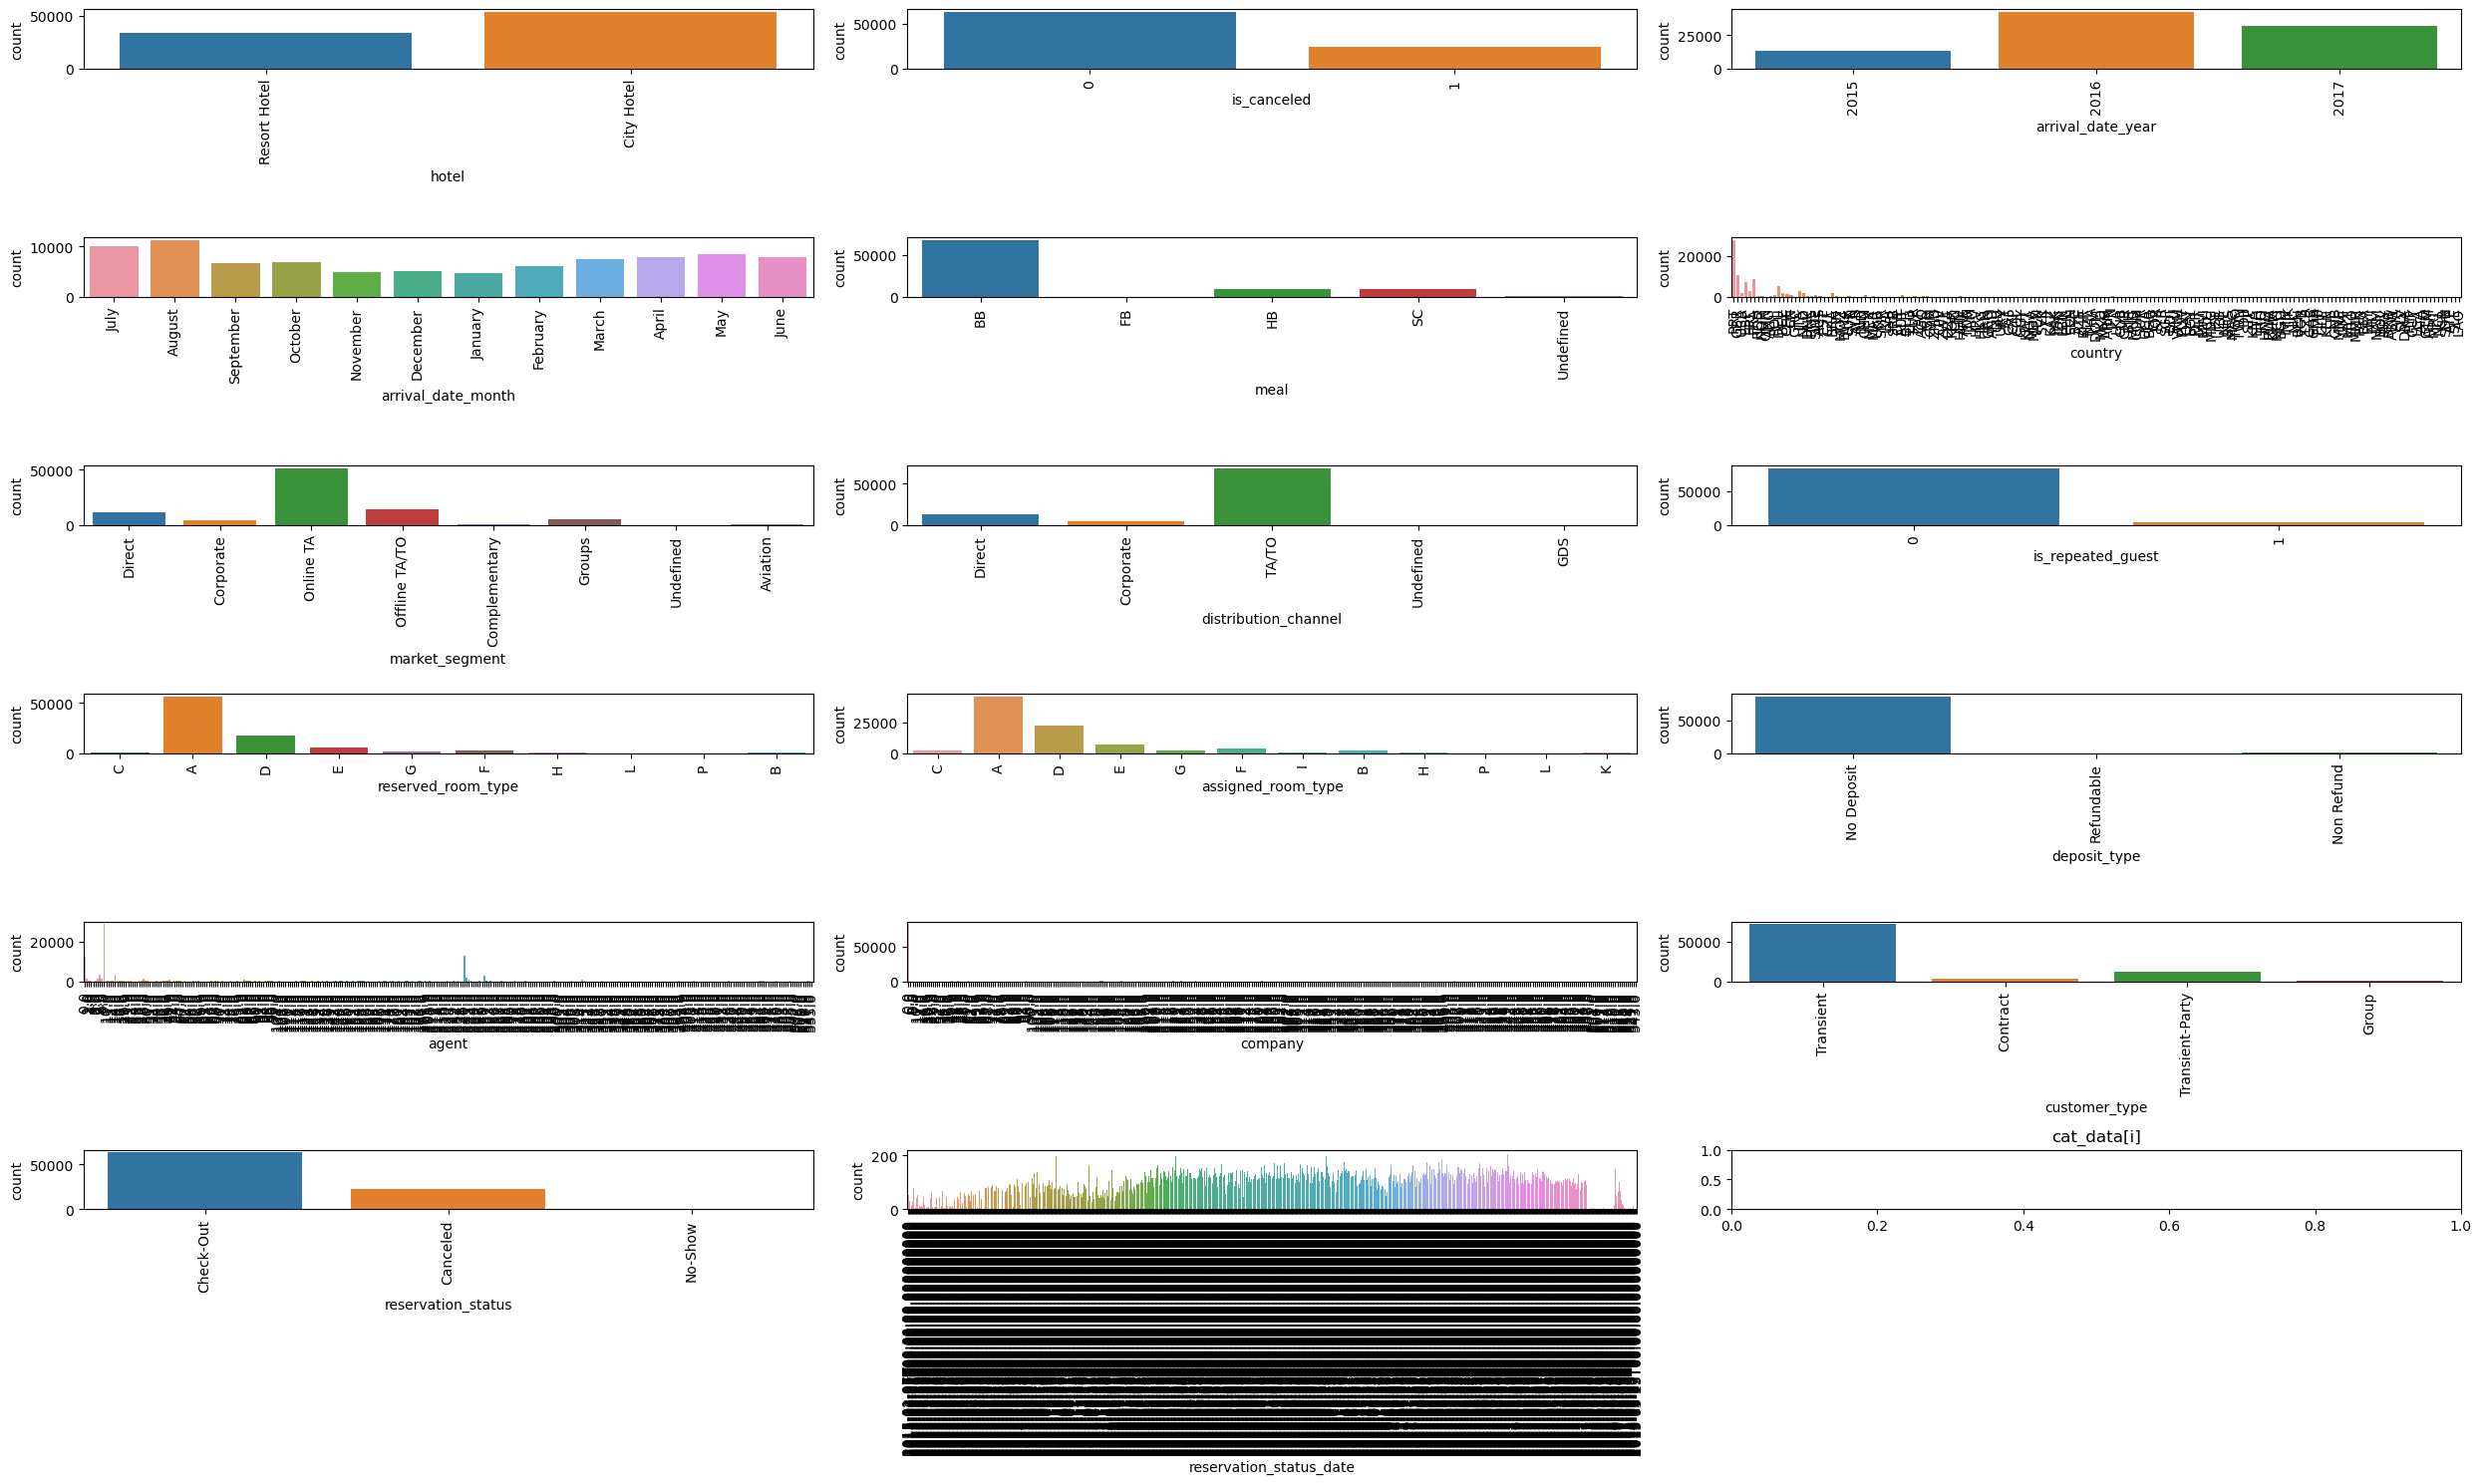

In [486]:
fig,ax = plt.subplots(6,3,figsize=(25,15))
for i,subplot in zip(cat_data.columns,ax.flatten()):
    ox = sns.countplot(cat_data[i],ax=subplot)
    ox.set_xticklabels(ox.get_xticklabels(), rotation=90)
    plt.title('cat_data[i]')
    
    
plt.tight_layout()
plt.show()

#### 1. Majority of the bookings have been made in city hotel
#### 2. Our target variable is imbalanced, so some balancing technique needs to be applied here
#### 3. Majority of the data is from the year 2016
#### 4. August is the busiest month for the business
#### 5. Most people opt for breakfast in bed(BB)
#### 6. Most guests are local i.e. Portugese
#### 7. Most guests have been acquired through online travel agents
#### 8. Travel Agents/Tour Operators are the most preferred distribution channels to sell the rooms
#### 9. Most guests are staying at the hotel for the first time
#### 10. Most customers book the room at 0 price
#### 11. Most guests opt for a short stay i.e are transient guests
#### 12. Travel agent with the id '9' books more rooms than anyother travel agent
#### 13. Most rows in our data are not corporate events(as expected)
#### 14. We also find out that their are undefined types in market segment type and distribution channel

### Bi-variate Analysis

In [487]:
cat_data=list(cat_data.columns)
cat_data

['hotel',
 'is_canceled',
 'arrival_date_year',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

Crosstab for hotel :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for is_canceled :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for arrival_date_year :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for arrival_date_month :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for meal :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for country :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for market_segment :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for distribution_channel :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for is_repeated_guest :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for reserved_room_type :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for assigned_room_type :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for deposit_type :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for agent :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for company :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for customer_type :
 AxesSubplot(0.125,0.11;0.775x0.77)
Crosstab for reservation_status :


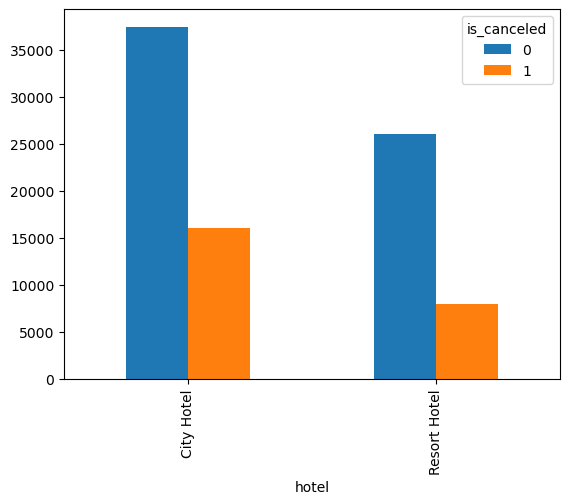

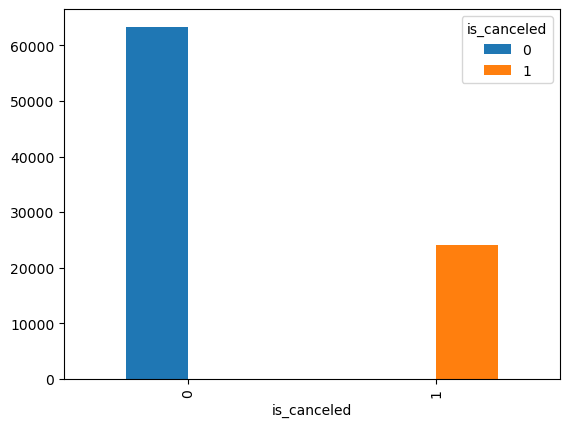

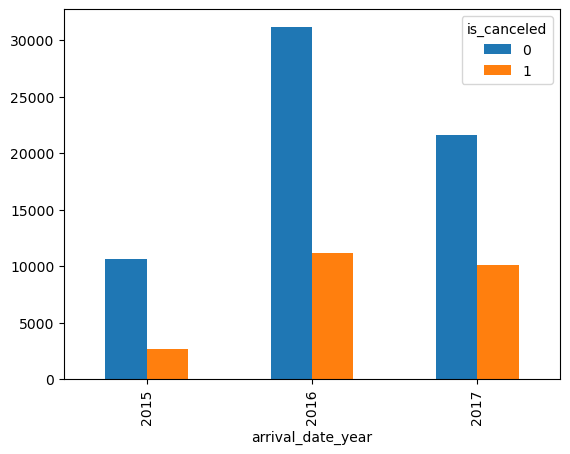

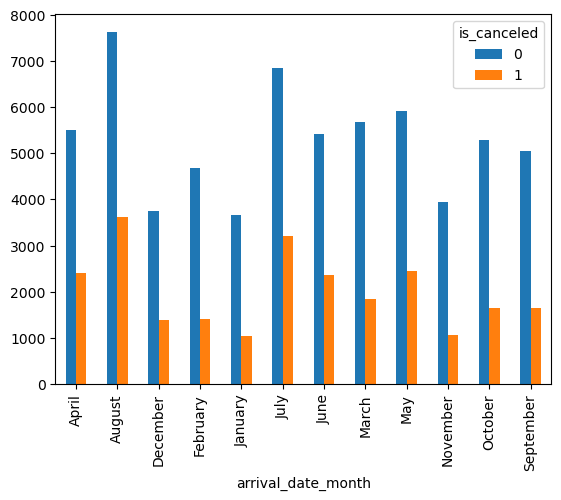

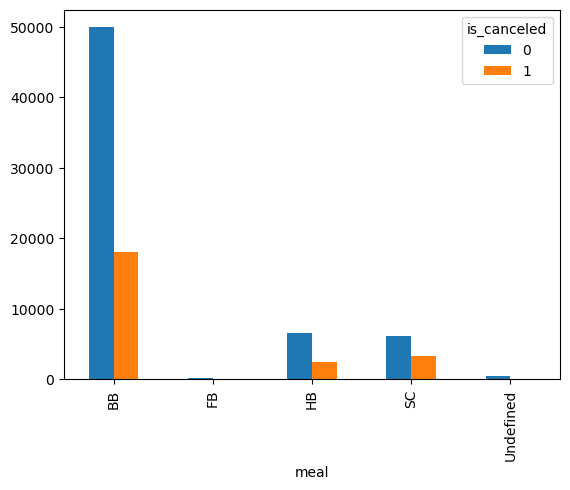

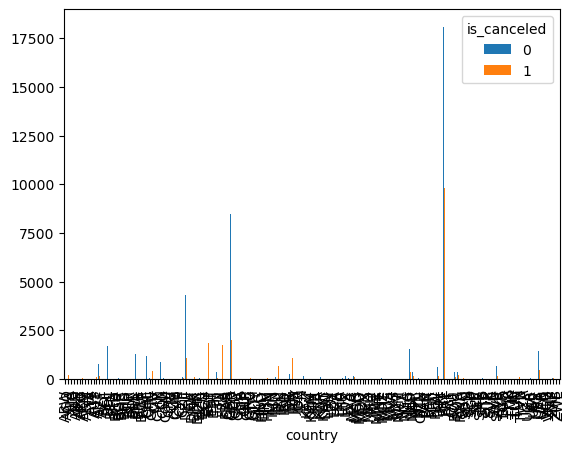

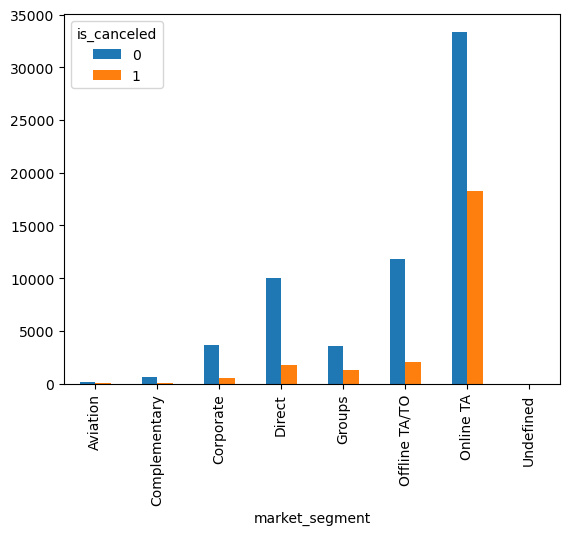

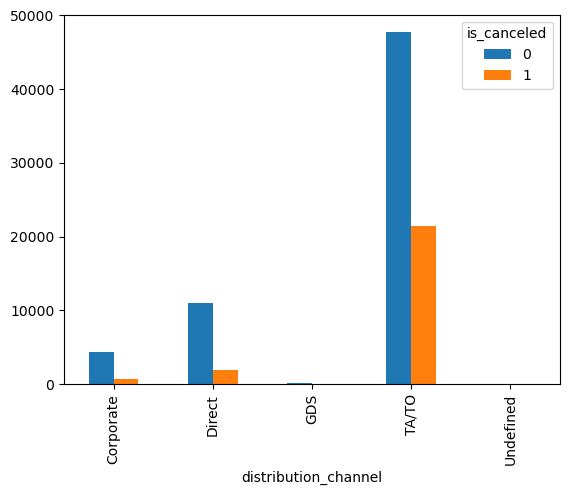

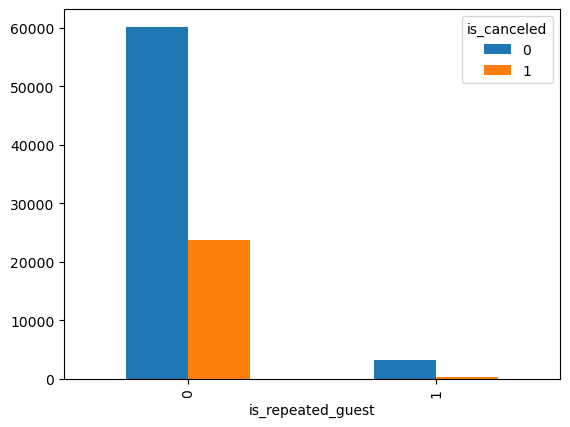

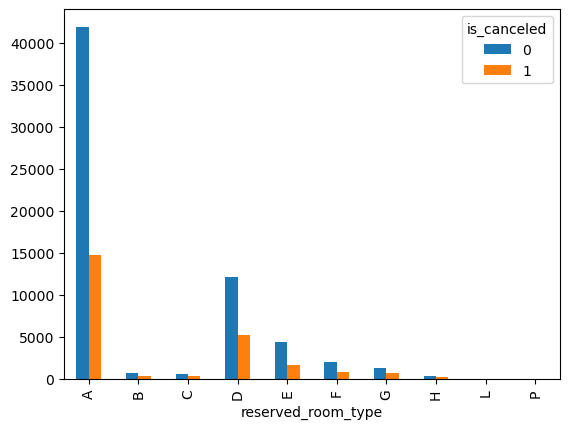

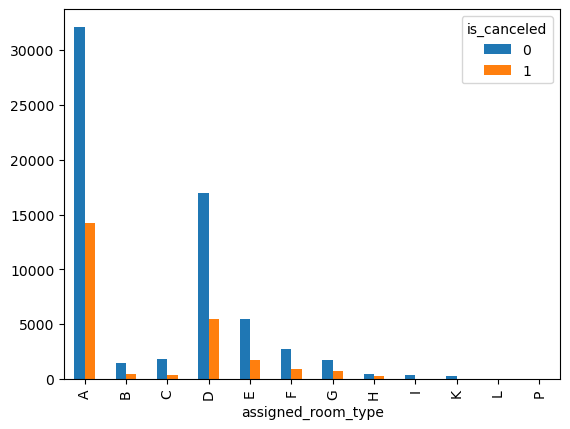

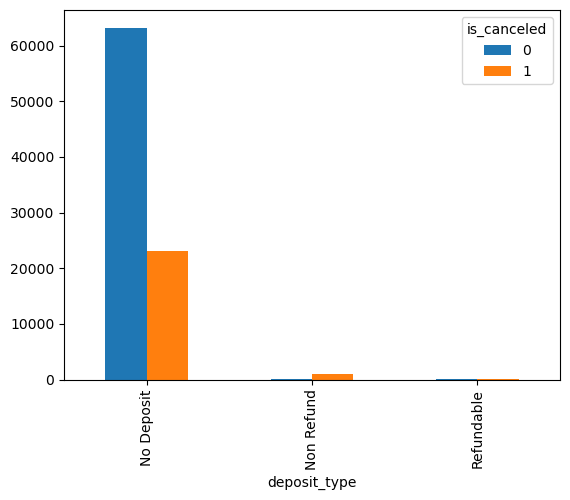

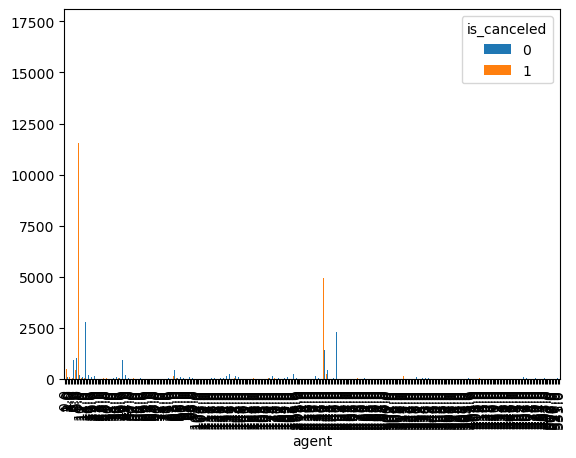

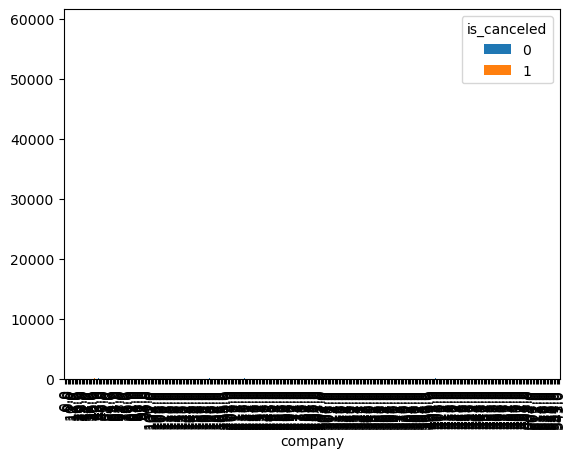

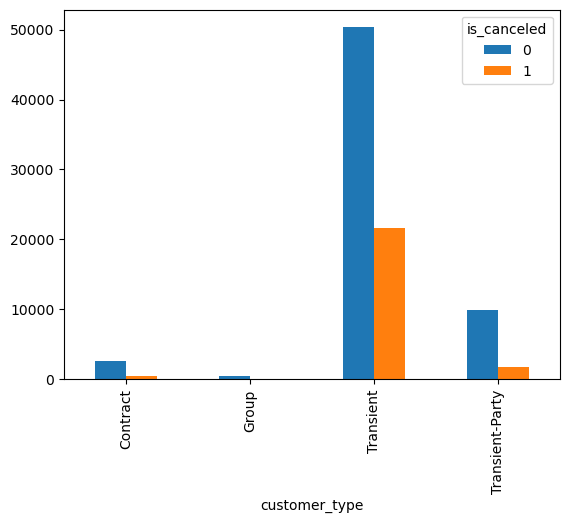

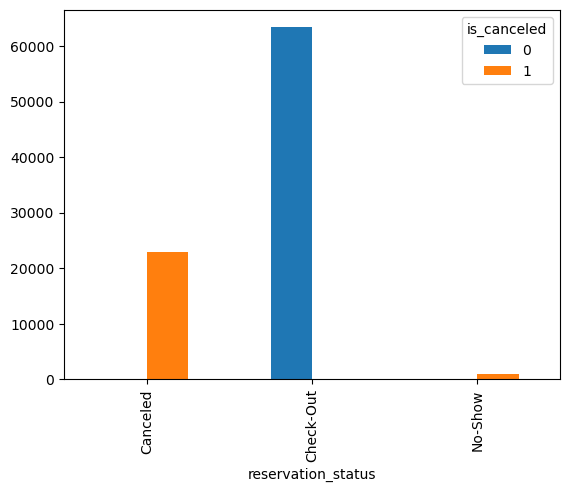

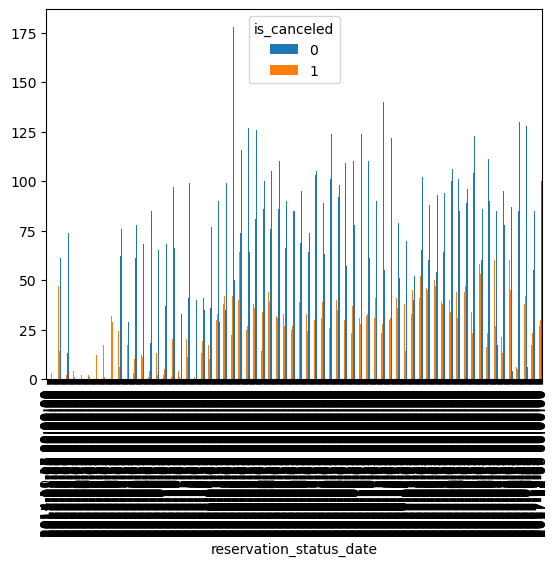

In [488]:
for i in cat_data:
    crosstab = pd.crosstab(index=data[i], columns=data['is_canceled']).plot(kind='bar')
    print('Crosstab for', i, ':\n', crosstab)

#### 1. City_hotel receives more cancellations when compared to resort_hotel.
#### 2. We can see in arrival_date_year there are 2015,2016,2017. 2016 and 2017 have more number of bookings than 2015 and thus the number of cancellations were also high
#### 3.August,July,May have high cancellations
#### 4.BB – Bed & Breakfast is the most preferred meal type,followed by HB,FB and SC
#### 5.The top 5 nationalities of our guests are:
####   1. PRT 48590
####   2. GBR 12129
####   3. FRA 10415
####   4. ESP 8568
####   5. DEU 7287
#### 6. Most of guests chose online TA to be their market segment thereby leading to maximum cancellations as well.
#### 7. Most of guests are visiting the hotel for the first time.
#### 8. The top 4 room types chosen by the guests are A with 85601, D with 19173, E with 6497 and F with 2890 bookngs.
#### 9. Majority of the guests do not pay any deposit amount to the hotel. This is maybe one of the reason for the cancellations
#### 10.Most of the people who are visting the hotel are transient and that is why this customer type also tends to have the highest amount of cancellations.


### Let us use a few questions to better understand and visualise our data
#### 1. How many bookings were canceled?


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

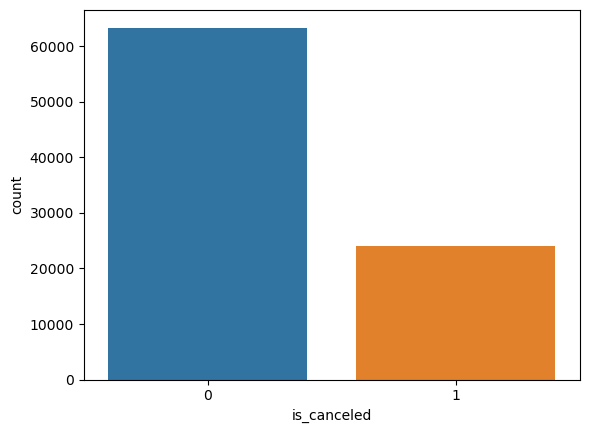

In [489]:
sns.countplot(data['is_canceled'])

#### 2. What is the booking ratio between Resort hotel and City hotel

In [490]:
data_cross_tab = pd.crosstab(data['hotel'],data['is_canceled'])

In [491]:
data_cross_tab['Total_Bookings'] = data_cross_tab[0] + data_cross_tab[1]

In [492]:
data_cross_tab

is_canceled,0,1,Total_Bookings
hotel,,,
City Hotel,37379,16049,53428
Resort Hotel,25992,7976,33968


## Statistical Tests

### Dropping unnecesary columns from the dataset

In [493]:
data['arrival_date_year'].value_counts()

2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64

In [495]:
import scipy.stats as stats

In [496]:
test_stat,p_val,dof,exp_val = stats.chi2_contingency(pd.crosstab(data['arrival_date_year'],data['is_canceled']))

In [497]:
print('Null hypothesis is that the columns, year and is_canceled are not related')
print('Since ',p_val,'is less than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, year and is_canceled are not related
Since  5.020628108258973e-148 is less than α = 0.05, we reject the null hypothesis


### From the above test we find out that arrival_date_year columns is important

In [498]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [499]:
test_stat1,p_val1,dof1,exp_val1 = stats.chi2_contingency(pd.crosstab(data['hotel'],data['is_canceled']))

In [500]:
print('Null hypothesis is that the columns, hotel and is_canceled are not related')
print('Since ',p_val1,'is less than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, hotel and is_canceled are not related
Since  2.325877630100099e-99 is less than α = 0.05, we reject the null hypothesis


### Hotel column is significant

In [501]:
cancelled_n1 = data[data['is_canceled']==0]['lead_time']
cancelled_y1 = data[data['is_canceled']==1]['lead_time']

In [502]:
test_stat2,p_val2 = stats.mannwhitneyu(cancelled_n1,cancelled_y1)

In [503]:
print('Null hypothesis is that the columns, lead_time and is_canceled are not related')
print('Since ',p_val2,'is less than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, lead_time and is_canceled are not related
Since  0.0 is less than α = 0.05, we reject the null hypothesis


### Lead time is significant

In [504]:
test_stat3,p_val3,dof3,exp_val3 = stats.chi2_contingency(pd.crosstab(data['arrival_date_month'],data['is_canceled']))

In [505]:
print('Null hypothesis is that the columns, arrival_date_month and is_canceled are not related')
print('Since ',p_val3,'is less than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, arrival_date_month and is_canceled are not related
Since  2.3650890822020976e-130 is less than α = 0.05, we reject the null hypothesis


### arrival_date_month is important

In [506]:
cancelled_n2 = data[data['is_canceled']==0]['arrival_date_week_number']
cancelled_y2 = data[data['is_canceled']==1]['arrival_date_week_number']

In [507]:
test_stat4,p_val4 = stats.mannwhitneyu(cancelled_n2,cancelled_y2)

In [508]:
print('Null hypothesis is that the columns, arrival_date_week_number and is_canceled are not related')
print('Since ',p_val4,'is greater than α = 0.05, we failed to reject the null hypothesis')

Null hypothesis is that the columns, arrival_date_week_number and is_canceled are not related
Since  0.882840157828326 is greater than α = 0.05, we failed to reject the null hypothesis


### arrival_date_week_number is not important???

In [509]:
cancelled_n3 = data[data['is_canceled']==0]['arrival_date_day_of_month']
cancelled_y3 = data[data['is_canceled']==1]['arrival_date_day_of_month']

In [510]:
test_stat5,p_val5 = stats.mannwhitneyu(cancelled_n3,cancelled_y3)

In [511]:
print('Null hypothesis is that the columns, arrival_date_day_of_month and is_canceled are not related')
print('Since ',p_val5,'is greater than α = 0.05, we failed to reject the null hypothesis')

Null hypothesis is that the columns, arrival_date_day_of_month and is_canceled are not related
Since  0.11556867286297079 is greater than α = 0.05, we failed to reject the null hypothesis


### arrival_date_day_of_month is not important???

In [512]:
cancelled_n4 = data[data['is_canceled']==0]['stays_in_weekend_nights']
cancelled_y4 = data[data['is_canceled']==1]['stays_in_weekend_nights']

In [513]:
test_stat6,p_val6 = stats.mannwhitneyu(cancelled_n4,cancelled_y4)

In [514]:
print('Null hypothesis is that the columns, stays_in_weekend_nights and is_canceled are not related')
print('Since ',p_val6,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, stays_in_weekend_nights and is_canceled are not related
Since  6.818202947947761e-70 is lesser than α = 0.05, we reject the null hypothesis


### stays_in_weekend_nights is important

In [515]:
cancelled_n5 = data[data['is_canceled']==0]['stays_in_week_nights']
cancelled_y5 = data[data['is_canceled']==1]['stays_in_week_nights']

In [516]:
test_stat7,p_val7 = stats.mannwhitneyu(cancelled_n5,cancelled_y5)

In [517]:
print('Null hypothesis is that the columns, stays_in_week_nights and is_canceled are not related')
print('Since ',p_val7,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, stays_in_week_nights and is_canceled are not related
Since  1.3211409706354398e-175 is lesser than α = 0.05, we reject the null hypothesis


### stays_in_week_nights is important

In [518]:
cancelled_n6 = data[data['is_canceled']==0]['adults']
cancelled_y6 = data[data['is_canceled']==1]['adults']

In [519]:
test_stat8,p_val8 = stats.mannwhitneyu(cancelled_n6,cancelled_y6)

In [520]:
print('Null hypothesis is that the columns, adults and is_canceled are not related')
print('Since ',p_val8,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, adults and is_canceled are not related
Since  8.735727480868029e-158 is lesser than α = 0.05, we reject the null hypothesis


### adults is important

In [521]:
cancelled_n7 = data[data['is_canceled']==0]['children']
cancelled_y7= data[data['is_canceled']==1]['children']

In [522]:
test_stat9,p_val9 = stats.mannwhitneyu(cancelled_n7,cancelled_y7)

In [523]:
print('Null hypothesis is that the columns, children and is_canceled are not related')
print('Since ',p_val9,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, children and is_canceled are not related
Since  1.4943736452834797e-73 is lesser than α = 0.05, we reject the null hypothesis


### children is important

In [524]:
cancelled_n8 = data[data['is_canceled']==0]['babies']
cancelled_y8= data[data['is_canceled']==1]['babies']

In [525]:
test_stat10,p_val10 = stats.mannwhitneyu(cancelled_n8,cancelled_y8)

In [526]:
print('Null hypothesis is that the columns, babies and is_canceled are not related')
print('Since ',p_val10,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, babies and is_canceled are not related
Since  3.4726739940571626e-10 is lesser than α = 0.05, we reject the null hypothesis


### babies is important

In [527]:
test_stat11,p_val11,dof11,exp_val11 = stats.chi2_contingency(pd.crosstab(data['meal'],data['is_canceled']))

In [528]:
print('Null hypothesis is that the columns, meals and is_canceled are not related')
print('Since ',p_val11,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, meals and is_canceled are not related
Since  1.244958118704273e-74 is lesser than α = 0.05, we reject the null hypothesis


### meals is important ???

In [529]:
test_stat12,p_val12,dof12,exp_val12 = stats.chi2_contingency(pd.crosstab(data['country'],data['is_canceled']))

In [530]:
print('Null hypothesis is that the columns, country and is_canceled are not related')
print('Since ',p_val12,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, country and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### country is important

In [531]:
test_stat13,p_val13,dof13,exp_val13 = stats.chi2_contingency(pd.crosstab(data['market_segment'],data['is_canceled']))

In [532]:
print('Null hypothesis is that the columns, market_segment and is_canceled are not related')
print('Since ',p_val13,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, market_segment and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### market_segment is important

In [533]:
test_stat14,p_val14,dof14,exp_val14 = stats.chi2_contingency(pd.crosstab(data['distribution_channel'],data['is_canceled']))

In [534]:
print('Null hypothesis is that the columns, distribution_channel and is_canceled are not related')
print('Since ',p_val14,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, distribution_channel and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### distribution_channel is important

In [535]:
test_stat15,p_val15,dof15,exp_val15 = stats.chi2_contingency(pd.crosstab(data['is_repeated_guest'],data['is_canceled']))

In [536]:
print('Null hypothesis is that the columns, is_repeated_guest and is_canceled are not related')
print('Since ',p_val15,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, is_repeated_guest and is_canceled are not related
Since  1.587484637713458e-154 is lesser than α = 0.05, we reject the null hypothesis


### is_repeated_guest is important

In [537]:
cancelled_n9 = data[data['is_canceled']==0]['previous_cancellations']
cancelled_y9= data[data['is_canceled']==1]['previous_cancellations']

In [538]:
test_stat16,p_val16 = stats.mannwhitneyu(cancelled_n9,cancelled_y9)

In [539]:
print('Null hypothesis is that the columns, previous_cancellations and is_canceled are not related')
print('Since ',p_val16,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, previous_cancellations and is_canceled are not related
Since  6.511086828758603e-306 is lesser than α = 0.05, we reject the null hypothesis


### previous_cancellations is important

In [540]:
cancelled_n10 = data[data['is_canceled']==0]['previous_bookings_not_canceled']
cancelled_y10= data[data['is_canceled']==1]['previous_bookings_not_canceled']

In [541]:
test_stat17,p_val17 = stats.mannwhitneyu(cancelled_n10,cancelled_y10)

In [542]:
print('Null hypothesis is that the columns, previous_bookings_not_canceled and is_canceled are not related')
print('Since ',p_val17,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, previous_bookings_not_canceled and is_canceled are not related
Since  9.699079151355652e-206 is lesser than α = 0.05, we reject the null hypothesis


### previous_bookings_not_canceled is important

In [543]:
test_stat18,p_val18,dof18,exp_val18 = stats.chi2_contingency(pd.crosstab(data['reserved_room_type'],data['is_canceled']))

In [544]:
print('Null hypothesis is that the columns, reserved_room_type and is_canceled are not related')
print('Since ',p_val18,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, reserved_room_type and is_canceled are not related
Since  1.168829127382243e-58 is lesser than α = 0.05, we reject the null hypothesis


### reserved_room_type is important???

In [545]:
test_stat19,p_val19,dof19,exp_val19 = stats.chi2_contingency(pd.crosstab(data['assigned_room_type'],data['is_canceled']))

In [546]:
print('Null hypothesis is that the columns, assigned_room_type and is_canceled are not related')
print('Since ',p_val19,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, assigned_room_type and is_canceled are not related
Since  4.7404185641047935e-161 is lesser than α = 0.05, we reject the null hypothesis


### assigned_room_type is important???

In [547]:
cancelled_n11 = data[data['is_canceled']==0]['booking_changes']
cancelled_y11= data[data['is_canceled']==1]['booking_changes']

In [548]:
test_stat20,p_val20 = stats.mannwhitneyu(cancelled_n11,cancelled_y11)

In [549]:
print('Null hypothesis is that the columns, booking_changes and is_canceled are not related')
print('Since ',p_val20,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, booking_changes and is_canceled are not related
Since  2.7204579326983562e-297 is lesser than α = 0.05, we reject the null hypothesis


### booking_changes is important

In [550]:
test_stat21,p_val21,dof21,exp_val21 = stats.chi2_contingency(pd.crosstab(data['deposit_type'],data['is_canceled']))

In [551]:
print('Null hypothesis is that the columns, deposit_type and is_canceled are not related')
print('Since ',p_val21,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, deposit_type and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### deposit_type is important

In [552]:
test_stat22,p_val22,dof22,exp_val22 = stats.chi2_contingency(pd.crosstab(data['agent'],data['is_canceled']))

In [553]:
print('Null hypothesis is that the columns, agent and is_canceled are not related')
print('Since ',p_val22,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, agent and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### agent is important

In [554]:
test_stat23,p_val23,dof23,exp_val23 = stats.chi2_contingency(pd.crosstab(data['company'],data['is_canceled']))

In [555]:
print('Null hypothesis is that the columns, company and is_canceled are not related')
print('Since ',p_val23,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, company and is_canceled are not related
Since  3.201803762697563e-81 is lesser than α = 0.05, we reject the null hypothesis


### company is important

In [556]:
cancelled_n12 = data[data['is_canceled']==0]['days_in_waiting_list']
cancelled_y12= data[data['is_canceled']==1]['days_in_waiting_list']

test_stat24,p_val24 = stats.mannwhitneyu(cancelled_n12,cancelled_y12)

In [557]:
print('Null hypothesis is that the columns, days_in_waiting_list and is_canceled are not related')
print('Since ',p_val24,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, days_in_waiting_list and is_canceled are not related
Since  1.1199385733155768e-05 is lesser than α = 0.05, we reject the null hypothesis


### days_in_waiting_list is important

In [558]:
test_stat25,p_val25,dof25,exp_val25 = stats.chi2_contingency(pd.crosstab(data['customer_type'],data['is_canceled']))

In [559]:
print('Null hypothesis is that the columns, customer_type and is_canceled are not related')
print('Since ',p_val25,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, customer_type and is_canceled are not related
Since  1.0927842051492652e-305 is lesser than α = 0.05, we reject the null hypothesis


### customer_type is important

In [560]:
cancelled_n13 = data[data['is_canceled']==0]['adr']
cancelled_y13= data[data['is_canceled']==1]['adr']

test_stat26,p_val26 = stats.mannwhitneyu(cancelled_n13,cancelled_y13)

In [561]:
print('Null hypothesis is that the columns, adr and is_canceled are not related')
print('Since ',p_val26,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, adr and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### adr is important

In [562]:
cancelled_n14 = data[data['is_canceled']==0]['required_car_parking_spaces']
cancelled_y14= data[data['is_canceled']==1]['required_car_parking_spaces']

test_stat27,p_val27 = stats.mannwhitneyu(cancelled_n14,cancelled_y14)

In [563]:
print('Null hypothesis is that the columns, required_car_parking_spaces and is_canceled are not related')
print('Since ',p_val27,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, required_car_parking_spaces and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### required_car_parking_spaces is important???

In [564]:
cancelled_n15 = data[data['is_canceled']==0]['total_of_special_requests']
cancelled_y15= data[data['is_canceled']==1]['total_of_special_requests']

test_stat28,p_val28 = stats.mannwhitneyu(cancelled_n15,cancelled_y15)

In [565]:
print('Null hypothesis is that the columns, total_of_special_requests and is_canceled are not related')
print('Since ',p_val28,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, total_of_special_requests and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### total_of_special_requests is important

In [566]:
test_stat29,p_val29,dof29,exp_val29 = stats.chi2_contingency(pd.crosstab(data['reservation_status'],data['is_canceled']))

In [567]:
print('Null hypothesis is that the columns, reservation_status and is_canceled are not related')
print('Since ',p_val29,'is lesser than α = 0.05, we reject the null hypothesis')

Null hypothesis is that the columns, reservation_status and is_canceled are not related
Since  0.0 is lesser than α = 0.05, we reject the null hypothesis


### reservation_status is important

In [568]:
### Since we have got to know that arrival_date_week_number , arrival_date_day_of_month are not important let us drop them

In [767]:
stats_data = data.drop(['arrival_date_week_number' , 'arrival_date_day_of_month'],axis=1)

In [768]:
data['is_canceled'].isnull().sum()  ### Checkpoint for null values in target variable 1

0

In [769]:
stats_data['is_canceled'].isnull().sum()  ### Checkpoint for null values in target variable 2

0

In [770]:
stats_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [571]:
### let us also drop the datetime column as we are not sure what to do with  it

In [771]:
stats_data.drop('reservation_status_date',inplace=True,axis=1)

In [772]:
stats_data.shape

(87396, 29)

In [773]:
stats_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,July,0,0,2,0,0,...,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,0,0,2,0,0,...,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,0,1,1,0,0,...,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,0,1,1,0,0,...,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,0,2,2,0,0,...,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out


In [774]:
stats_num_data = stats_data.select_dtypes(include=np.number)

In [775]:
stats_cat_data = stats_data.select_dtypes(exclude=np.number)

In [776]:
### dropping the target variable from stats_cat_data so that it doesnot get encoded

In [777]:
stats_cat_data.drop('is_canceled',axis=1,inplace=True)

In [778]:
stats_data['is_canceled'] = stats_data['is_canceled'].astype('int64')  ## converting target variable into numeric columns manually

In [779]:
stats_data['is_canceled'].isnull().sum()### Checkpoint for checking null values in the target variable 3

0

### Encoding categorical variables

In [780]:
encoded_data = pd.get_dummies(stats_cat_data,drop_first=True)

In [781]:
final_data = pd.concat([stats_num_data,encoded_data,stats_data['is_canceled']],axis=1)

In [782]:
from sklearn.model_selection import train_test_split

In [783]:
X = final_data.drop('is_canceled',axis=1)

In [784]:
y = final_data['is_canceled']

In [785]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=69)

### Taking base model as LogisticRegressoion

In [786]:
from sklearn.linear_model import LogisticRegression

In [787]:
lr = LogisticRegression()

In [788]:
model_lr = lr.fit(xtrain,ytrain)

In [789]:
ypred_lr = model_lr.predict(xtest)

In [790]:
from sklearn.metrics import classification_report,confusion_matrix

In [791]:
print(classification_report(ytest,ypred_lr))  ### Logistic regression is overfitting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19054
           1       1.00      1.00      1.00      7165

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



In [792]:
confusion_matrix(ytest,ypred_lr)

array([[19049,     5],
       [    2,  7163]], dtype=int64)

## Scaling the data

### To interpret the meaning of the ß coefficients in logistic regression we first need to scale the data

In [794]:
from sklearn.preprocessing import StandardScaler

In [795]:
ss = StandardScaler()

In [796]:
scaled_num_array = ss.fit_transform(stats_num_data)
scaled_num_array

array([[ 3.04593897, -0.97417229, -1.27845263, ..., -1.93292517,
        -0.29916998, -0.83968365],
       [ 7.63619564, -0.97417229, -1.27845263, ..., -1.93292517,
        -0.29916998, -0.83968365],
       [-0.84706351, -0.97417229, -0.79149629, ..., -0.56962686,
        -0.29916998, -0.83968365],
       ...,
       [-0.53329913,  0.96397107,  1.15632909, ...,  0.9338185 ,
        -0.29916998,  3.96834835],
       [ 0.33826859,  0.96397107,  1.15632909, ..., -0.03521393,
        -0.29916998, -0.83968365],
       [ 1.45387527,  0.96397107,  2.13024178, ...,  0.81548421,
        -0.29916998,  1.56433235]])

In [797]:
scaled_data = pd.DataFrame(scaled_num_array,columns=stats_num_data.columns)

In [798]:
### In logistic regression , outliers cause a lot of trouble and have a huge influence on the line that/hyperplane and 
### their coefficients(ß) that seperate the classes. so let us treat the outliers using 3σ rule/empirical rule as
### we have already scaled the data

In [799]:
ul_data = np.where(scaled_data>3,3,scaled_data)
outliers_free_data = np.where(scaled_data<-3,-3,ul_data)
outliers_free_data = pd.DataFrame(outliers_free_data,columns=scaled_data.columns)
outliers_free_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.151549,-0.29917,0.362324


In [800]:
outliers_free_data.shape

(87396, 13)

## Checking for the assumptions of Logistic Regression

### Checking for multi collinearity

In [802]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [803]:
vif = pd.DataFrame()

In [804]:
vif['Features'] = outliers_free_data.columns

In [805]:
vif['VIF values'] = [    variance_inflation_factor(outliers_free_data.values,i)           for i in range(len(outliers_free_data.columns))]

In [806]:
vif  ### From the vif dataframe we see that multicollinearity is absent in our data set

,Features,VIF values
0,lead_time,1.214396
1,stays_in_weekend_nights,1.336744
2,stays_in_week_nights,1.424268
3,adults,1.228899
4,children,1.143570
5,babies,1.026748
6,previous_cancellations,1.148612
7,previous_bookings_not_canceled,1.221058
8,booking_changes,1.035058
9,days_in_waiting_list,1.029225


In [807]:
### Now let us check if the independent features and the probability values predicted by the logistic regression model
### vary linearly or not

In [678]:
### But before that let us build the logistic regression model on the scaled,outlier free data

## Restting the indices of each dataframe before concating so that their are no null values

In [808]:
outliers_free_data = outliers_free_data.reset_index().drop('index',axis=1)
encoded_data = encoded_data.reset_index().drop('index',axis=1)

In [809]:
encoded_data.shape

(87396, 918)

In [810]:
stats_data['is_canceled'].shape

(87396,)

In [811]:
87396-26679

60717

In [813]:
stats_data['is_canceled'].isnull().sum()  ### Checkpoint 4 for null values in target varriable

0

In [822]:
target_variable_reset_index = stats_data['is_canceled'].reset_index().drop('index',axis=1)

In [823]:
stats_data['is_canceled'].isnull().sum()

0

In [824]:
outliers_free_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.151549,-0.29917,0.362324


In [825]:
outliers_free_data.isnull().sum() ### Outliers_free_data doesn;t have any outliers

lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [826]:
outliers_free_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.151549,-0.29917,0.362324


In [827]:
outliers_free_data.shape

(87396, 13)

In [828]:
encoded_data.head()

,hotel_Resort Hotel,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,company_531.0,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [829]:
encoded_data.isnull().sum()  ### doesnot have any null values

hotel_Resort Hotel               0
arrival_date_year_2016           0
arrival_date_year_2017           0
arrival_date_month_August        0
arrival_date_month_December      0
                                ..
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
reservation_status_Check-Out     0
reservation_status_No-Show       0
Length: 918, dtype: int64

In [830]:
encoded_data.shape

(87396, 918)

In [831]:
pd.concat([outliers_free_data,target_variable_reset_index],axis=1).isnull().sum()

lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
is_canceled                       0
dtype: int64

In [833]:
pd.concat([encoded_data,target_variable_reset_index],axis=1).isnull().sum()

hotel_Resort Hotel               0
arrival_date_year_2016           0
arrival_date_year_2017           0
arrival_date_month_August        0
arrival_date_month_December      0
                                ..
customer_type_Transient          0
customer_type_Transient-Party    0
reservation_status_Check-Out     0
reservation_status_No-Show       0
is_canceled                      0
Length: 919, dtype: int64

In [834]:
scaled_no_outliers_df = pd.concat([outliers_free_data,encoded_data,target_variable_reset_index],axis=1)
scaled_no_outliers_df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,is_canceled
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0


In [1045]:
scaled_no_outliers_df.isnull().sum().sum()

0

In [836]:
X = scaled_no_outliers_df.drop('is_canceled',axis=1)
y = scaled_no_outliers_df['is_canceled']

In [837]:
x_scaled_train,x_scaled_test,y_scaled_train,y_scaled_test = train_test_split(X,y,test_size=0.30,random_state=69)

In [838]:
scaled_model_lr = lr.fit(x_scaled_train,y_scaled_train)

In [839]:
ypred_scaled_model_lr = scaled_model_lr.predict(x_scaled_test)

In [841]:
print(classification_report(y_scaled_test,ypred_scaled_model_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19054
           1       1.00      1.00      1.00      7165

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



### We can do something with the agent ,company and country column so that the number of subgroups are reduced so that
### after encoding the no. features decrease drastically. High number of features seems to be a very big issue here
### as logistic regression is overfitting here

In [847]:
predicted_probabilities_array = scaled_model_lr.predict_proba(x_scaled_test)
predicted_probabilities_array

array([[9.98846540e-01, 1.15345969e-03],
       [9.99672650e-01, 3.27349658e-04],
       [7.03838652e-04, 9.99296161e-01],
       ...,
       [9.99300624e-01, 6.99376473e-04],
       [9.99505959e-01, 4.94040583e-04],
       [9.99128282e-01, 8.71717885e-04]])

In [991]:
0.99884+0.001534

1.0003739999999999

In [848]:
predicted_probabilities = pd.DataFrame(predicted_probabilities_array[0],columns=['Probabilities'])
predicted_probabilities.head()

,Probabilities
0,0.998847
1,0.001153


In [849]:
scaled_no_outliers_df.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,company_534.0,company_539.0,company_541.0,company_543.0,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,is_canceled
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0


In [850]:
stats_cat_data.head()

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
0,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
1,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
2,Resort Hotel,2015,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,0.0,0.0,Transient,Check-Out
3,Resort Hotel,2015,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304.0,0.0,Transient,Check-Out
4,Resort Hotel,2015,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240.0,0.0,Transient,Check-Out


In [994]:
stats_cat_data['country'].value_counts()[:11]

PRT    27905
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
USA     1875
Name: country, dtype: int64

## Considering only those countries whose frequency is on the higher side

In [881]:
countries_to_consider = list(stats_cat_data['country'].value_counts(normalize=True)[:11].index) ### considering 
### the top 11 countries according to value counts

In [864]:
countries_to_consider 

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA']

In [866]:
countries_to_consider.index('PRT')

0

In [869]:
def country(x):
    if x in countries_to_consider:
        return countries_to_consider.index(x)
    else:
        return -1
    

In [873]:
exp_cat_data = stats_cat_data.copy()
exp_cat_data.head()

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
0,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
1,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
2,Resort Hotel,2015,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,0.0,0.0,Transient,Check-Out
3,Resort Hotel,2015,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304.0,0.0,Transient,Check-Out
4,Resort Hotel,2015,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240.0,0.0,Transient,Check-Out


In [874]:
exp_cat_data['country'] = exp_cat_data['country'].apply(country)

In [877]:
exp_cat_data['country'].value_counts()

 0     27905
-1     13638
 1     10433
 2      8837
 3      7252
 4      5387
 5      3066
 6      3016
 7      2081
 8      1995
 9      1911
 10     1875
Name: country, dtype: int64

## Considering only those agents whose frequency is on the higher side

In [903]:
agents_to_consider = list(exp_cat_data['agent'].value_counts(normalize=True).iloc[:12].index)

In [998]:
stats_cat_data['agent'].value_counts(normalize=True)[:12]

9.0      0.329065
240.0    0.149069
0.0      0.139514
14.0     0.038320
7.0      0.037759
250.0    0.031798
241.0    0.018811
28.0     0.017186
8.0      0.015825
1.0      0.014097
6.0      0.012781
40.0     0.011282
314.0    0.009657
242.0    0.008261
83.0     0.007025
85.0     0.005996
243.0    0.005458
171.0    0.004600
27.0     0.004520
3.0      0.004154
22.0     0.003948
11.0     0.003639
15.0     0.003467
196.0    0.003215
177.0    0.003169
96.0     0.003112
138.0    0.002941
37.0     0.002574
16.0     0.002517
229.0    0.002494
5.0      0.002472
10.0     0.002449
21.0     0.002277
42.0     0.002220
115.0    0.002197
156.0    0.002140
26.0     0.002140
175.0    0.002082
195.0    0.002071
86.0     0.002060
273.0    0.002048
251.0    0.002002
134.0    0.001922
143.0    0.001865
298.0    0.001831
152.0    0.001785
168.0    0.001751
19.0     0.001728
315.0    0.001728
12.0     0.001522
Name: agent, dtype: float64

In [997]:
agents_to_consider

[9.0, 240.0, 0.0, 14.0, 7.0, 250.0, 241.0, 28.0, 8.0, 1.0, 6.0, 40.0]

In [907]:
 exp_cat_data['agent'] = exp_cat_data['agent'].apply( lambda x : agents_to_consider.index(x)  if x in  agents_to_consider  else -1)

## Considering only those companies whose frequency is on the higher side

In [916]:
companies_to_consider = list(exp_cat_data['company'].value_counts(normalize=True).iloc[:10].index)

In [919]:
companies_to_consider

[0.0, 40.0, 223.0, 45.0, 153.0, 154.0, 219.0, 174.0, 281.0, 233.0]

In [921]:
exp_cat_data['company'] = exp_cat_data['company'].apply(lambda x : companies_to_consider.index(x) if x in companies_to_consider else -1)


In [924]:
comp_agent_country_data = exp_cat_data[['country','agent','company']]

In [929]:
comp_agent_country_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   country  87396 non-null  int64
 1   agent    87396 non-null  int64
 2   company  87396 non-null  int64
dtypes: int64(3)
memory usage: 4.7 MB


In [930]:
exp_cat_data.drop(['country','agent','company'],axis=1,inplace=True)

In [931]:
exp_cat_data.head()

,hotel,arrival_date_year,arrival_date_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,2015,July,BB,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,2015,July,BB,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,2015,July,BB,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,2015,July,BB,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,2015,July,BB,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


In [934]:
encoded_exp_data = pd.get_dummies(exp_cat_data,drop_first=True)

In [939]:
outliers_free_data.shape

(87396, 13)

In [952]:
target_variable_reset_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  87396 non-null  int64
dtypes: int64(1)
memory usage: 682.9 KB


In [955]:
encoded_exp_data.head()

,level_0,index,hotel_Resort Hotel,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,2,2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,3,3,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,4,4,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


## Again resetting all the indices so that null values are not generated

In [956]:
### resetting indexes of all the data frames to concat
outliers_free_data = outliers_free_data.reset_index()
comp_agent_country_data = comp_agent_country_data.reset_index()
target_variable = target_variable_reset_index.reset_index()

In [962]:
outliers_free_data.drop('index',axis=1,inplace=True)
comp_agent_country_data.drop('index',axis=1,inplace=True)
target_variable.drop('index',axis=1,inplace=True)
encoded_exp_data.drop(['index','level_0'],axis=1,inplace=True)

In [967]:
exp_final_data = pd.concat([outliers_free_data,comp_agent_country_data,encoded_exp_data,target_variable],axis=1)

In [972]:
exp_final_data.isnull().sum() ### no null values in the concated data

lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
country                           0
agent                             0
company                           0
hotel_Resort Hotel                0
arrival_date_year_2016            0
arrival_date_year_2017            0
arrival_date_month_August         0
arrival_date_month_December       0
arrival_date_month_February       0
arrival_date_month_January        0
arrival_date_month_July           0
arrival_date_month_June           0
arrival_date_month_March          0
arrival_date_month_May            0
arrival_date_month_November 

In [973]:
X = exp_final_data.drop('is_canceled',axis=1)
y = exp_final_data['is_canceled']

In [974]:
from sklearn.model_selection import train_test_split

In [975]:
xtrain_exp,xtest_exp,ytrain_exp,ytest_exp = train_test_split(X,y,test_size=0.30,random_state=69,stratify=y)

In [976]:
exp_lr_model = lr.fit(xtrain_exp,ytrain_exp)

In [977]:
ypred_exp = exp_lr_model.predict(xtest_exp)

In [981]:
from sklearn.metrics import classification_report,confusion_matrix

In [980]:
print(classification_report(ytest_exp,ypred_exp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19011
           1       1.00      1.00      1.00      7208

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



In [982]:
confusion_matrix(ytest_exp,ypred_exp)

array([[19011,     0],
       [    0,  7208]], dtype=int64)

### The logistic regression model is still overfitting 

In [984]:
exp_final_data.shape

(87396, 74)

In [988]:
outliers_free_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.151549,-0.29917,0.362324


In [989]:
87396/74**2

15.95982468955442

In [999]:
stats_cat_data['country'].nunique()

177

In [1000]:
stats_cat_data.head()

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,reservation_status
0,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
1,Resort Hotel,2015,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,0.0,0.0,Transient,Check-Out
2,Resort Hotel,2015,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,0.0,0.0,Transient,Check-Out
3,Resort Hotel,2015,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,304.0,0.0,Transient,Check-Out
4,Resort Hotel,2015,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,240.0,0.0,Transient,Check-Out


In [1003]:
stats_cat_data['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

## Harsha's approach(Developed & Undeveloped)

In [1012]:
lower_income_countries = ['AFG', 'BFA', 'BDI', 'CAF', 'TCD', 'COD', 'ERI', 'ETH', 'GMB', 'GIN', 'GNB', 'HTI', 'PRK', 'LBR', 'MDG', 'MWI', 'MLI', 'MOZ', 'MMR', 'NPL', 'NER', 'RWA', 'SLE', 'SOM', 'SSD', 'SDN', 'TJK', 'TZA', 'TGO', 'UGA', 'YEM']

lower_middle_income_countries = ['BGD', 'BEN', 'BOL', 'KHM', 'CMR', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'SLV', 'SWZ', 'GHA', 'GTM', 'HND', 'IND', 'KEN', 'KIR', 'XKX', 'KGZ', 'LAO', 'LSO', 'MRT', 'FSM', 'MDA', 'MNG', 'MAR', 'NIC', 'NGA', 'PAK', 'PNG', 'PHL', 'WSM', 'STP', 'SEN', 'SLB', 'LKA', 'SDN', 'TLS', 'TON', 'TUN', 'UKR', 'UZB', 'VUT', 'VNM', 'PSE', 'ZMB']


In [1013]:
developed_undeveloped_data = stats_cat_data.copy()

In [1014]:
developed_undeveloped_data['country'] = developed_undeveloped_data['country'].apply(lambda x :  'low' if x in lower_income_countries else 'middle' if x in lower_middle_income_countries else 'upper')

In [1015]:
developed_undeveloped_data.drop(['agent','company'],axis=1,inplace=True)

In [1016]:
developed_undeveloped_data.head()

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,2015,July,BB,upper,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,2015,July,BB,upper,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,2015,July,BB,upper,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,2015,July,BB,upper,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,2015,July,BB,upper,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


In [1017]:
developed_undeveloped_encoded = pd.get_dummies(developed_undeveloped_data,drop_first=True)

In [1018]:
developed_undeveloped_encoded.head()

,hotel_Resort Hotel,arrival_date_year_2016,arrival_date_year_2017,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1024]:
developed_undeveloped_encoded = developed_undeveloped_encoded.reset_index()
developed_undeveloped_encoded.drop('index',axis=1,inplace=True)

In [1030]:
dev_undev_final_data = pd.concat([outliers_free_data,developed_undeveloped_encoded,target_variable_reset_index],axis=1)
dev_undev_final_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,is_canceled
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,...,0,0,0,0,0,1,0,1,0,0
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,...,0,0,0,0,0,1,0,1,0,0


In [1032]:
X_dev_undev = dev_undev_final_data.drop('is_canceled',axis=1)
y_dev_undev = dev_undev_final_data['is_canceled']

In [1038]:
xtrain_dev_undev,xtest_dev_undev,ytrain_dev_undev,ytest_dev_undev = train_test_split(X_dev_undev,y_dev_undev,test_size=0.30,random_state = 69,stratify=y_dev_undev)

In [1052]:
dev_undev_lrmodel = lr.fit(xtrain_dev_undev,ytrain_dev_undev)

In [1053]:
ypred_dev_undev = dev_undev_lrmodel.predict(xtest_dev_undev)

In [1054]:
print(classification_report(ytest_dev_undev,ypred_dev_undev))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84     19011
           1       0.00      0.00      0.00      7208

    accuracy                           0.73     26219
   macro avg       0.36      0.50      0.42     26219
weighted avg       0.53      0.73      0.61     26219



In [1055]:
confusion_matrix(ytest_dev_undev,ypred_dev_undev)

array([[19011,     0],
       [ 7208,     0]], dtype=int64)

In [1077]:
dev_undev_lrmodel.coef_

array([[ 1.30547089e-09,  1.52819281e-10,  2.21893095e-10,
         5.54165424e-10,  3.81858038e-10, -4.40822191e-11,
         3.67102705e-10, -2.39883786e-10, -6.30299879e-10,
         5.20212000e-11,  1.17203264e-09, -1.47649553e-09,
        -7.40354441e-10, -2.43558548e-05, -1.13773369e-09,
        -2.92522167e-10,  3.38693126e-10,  3.90161262e-11,
        -3.21294283e-11, -7.95872228e-11, -7.57447310e-11,
         3.46442388e-11,  4.24569961e-11, -6.39845011e-11,
         1.50407205e-11, -8.90201366e-11, -1.02117280e-10,
        -9.14102613e-11, -7.27098245e-12, -1.56060296e-10,
         2.36639009e-10, -2.04603792e-11,  1.39729122e-11,
        -3.91572582e-10, -1.80884713e-11, -1.60025413e-10,
        -3.77096764e-10, -4.47245101e-11, -4.20436140e-10,
         6.44291012e-10,  3.70902629e-13, -4.16279669e-10,
         1.83799425e-13,  2.24812035e-10,  4.37263688e-13,
        -1.51485077e-10,  1.14576022e-11, -1.29192528e-11,
         1.83658812e-11, -1.02695769e-10,  3.97865939e-1

### The logistic regression model is under fitting terribly. Also our model is not at all predicting positives

### Let us try implementing a more complex model on Harsha's idea

In [1049]:
from sklearn.tree import DecisionTreeClassifier

In [1051]:
dt = DecisionTreeClassifier(random_state=69)

In [1056]:
dev_undev_dtmodel = dt.fit(xtrain_dev_undev,ytrain_dev_undev)

In [1057]:
ypred_dt_dev_undev = dev_undev_dtmodel.predict(xtest_dev_undev)

In [1058]:
print(classification_report(ytest_dev_undev,ypred_dt_dev_undev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19011
           1       1.00      1.00      1.00      7208

    accuracy                           1.00     26219
   macro avg       1.00      1.00      1.00     26219
weighted avg       1.00      1.00      1.00     26219



In [1059]:
confusion_matrix(ypred_dt_dev_undev,ytest_dev_undev)

array([[19011,     0],
       [    0,  7208]], dtype=int64)

In [1063]:
dev_undev_dtmodel.feature_names_in_

array(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'level_0', 'hotel_Resort Hotel',
       'arrival_date_year_2016', 'arrival_date_year_2017',
       'arrival_date_month_August', 'arrival_date_month_December',
       'arrival_date_month_February', 'arrival_date_month_January',
       'arrival_date_month_July', 'arrival_date_month_June',
       'arrival_date_month_March', 'arrival_date_month_May',
       'arrival_date_month_November', 'arrival_date_month_October',
       'arrival_date_month_September', 'meal_FB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'country_middle', 'country_upper',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Off

### The Decision Tree model is overfitting(pretty obvious as I haven't pruned the tree)

In [1064]:
import scipy.stats as stats

In [1066]:
stats.chi2_contingency(pd.crosstab(dev_undev_final_data['is_canceled'],dev_undev_final_data['reservation_status_Check-Out']))

(87390.9832446471,
 0.0,
 1,
 array([[17420.57159367, 45950.42840633],
        [ 6604.42840633, 17420.57159367]]))

In [1067]:
pd.crosstab(dev_undev_final_data['reservation_status_Check-Out'],dev_undev_final_data['is_canceled'])

is_canceled,0,1
reservation_status_Check-Out,,
0,0,24025
1,63371,0


### From the above cross tab we can see that reservation_status_check_out and is_canceled are mutually exclusive of each other so I am going to remove this feature and try building the model then

In [1142]:
exp_final_data.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'country', 'agent', 'company',
       'hotel_Resort Hotel', 'arrival_date_year_2016',
       'arrival_date_year_2017', 'arrival_date_month_August',
       'arrival_date_month_December', 'arrival_date_month_February',
       'arrival_date_month_January', 'arrival_date_month_July',
       'arrival_date_month_June', 'arrival_date_month_March',
       'arrival_date_month_May', 'arrival_date_month_November',
       'arrival_date_month_October', 'arrival_date_month_September', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'm

In [1082]:
exp_final_data_without_reservation = exp_final_data.drop(['reservation_status_No-Show','reservation_status_Check-Out'],axis=1)

In [1144]:
exp_final_data_without_reservation.shape

(87396, 72)

In [1083]:
X_exp_without_reservation = exp_final_data_without_reservation.drop('is_canceled',axis=1)
y_exp_without_reservation = exp_final_data_without_reservation['is_canceled']

In [1084]:
xtrain_exp_wo_res,xtest_exp_wo_res,ytrain_exp_wo_res,ytest_exp_wo_res = train_test_split(X_exp_without_reservation,
                                                                                        y_exp_without_reservation,
                                                                                        test_size=0.30,
                                                                                        random_state=69,
                                                                                        stratify = y_exp_without_reservation)

In [1085]:
exp_wo_res_lrmodel = lr.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)

In [1086]:
ypred_exp_wo_res = exp_wo_res_lrmodel.predict(xtest_exp_wo_res)

In [1088]:
print(classification_report(ypred_exp_wo_res,ytest_exp_wo_res))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     21537
           1       0.45      0.70      0.55      4682

    accuracy                           0.80     26219
   macro avg       0.69      0.76      0.71     26219
weighted avg       0.84      0.80      0.81     26219



In [1186]:
(exp_wo_res_lrmodel.coef_)

array([[ 0.47821666,  0.01544187,  0.09357983,  0.03637518,  0.10241721,
         0.15405624,  1.6455596 , -1.29975298, -0.29293597, -0.05263111,
         0.38803728, -2.63434105, -0.56924522, -0.08499594, -0.0802644 ,
        -0.1005212 ,  0.26679141,  0.19805113,  0.25826316, -0.32489227,
         0.22442151,  0.09072733,  0.07394373, -0.35148517, -0.21163093,
        -0.01535006, -0.12514278,  0.10773175, -0.06631171, -0.13803647,
         0.14844527, -0.20341147,  0.14372623, -0.320654  ,  0.72123651,
        -0.31937956, -0.44533487, -0.49211179, -1.32813649,  0.09711462,
         0.25127292, -0.1059979 , -0.63477407,  0.28361779,  0.36698722,
        -0.98195581,  0.63225556,  1.29765276,  0.96123683,  1.72799577,
         1.71185679,  2.2445581 ,  0.22249143,  0.1183211 ,  0.40236084,
        -0.66210019, -1.4245164 , -1.12092834, -1.85824111, -2.29276881,
        -2.73439467, -0.63631605, -2.68366655, -1.89257797,  0.03968835,
         0.40236084,  3.62201222,  0.83500006,  0.4

In [1192]:
exp_wo_res_lrmodel.coef_ = exp_wo_res_lrmodel.coef_.reshape(71,1)

In [1195]:
exp_wo_res_lrmodel.coef_

array([[ 0.47821666],
       [ 0.01544187],
       [ 0.09357983],
       [ 0.03637518],
       [ 0.10241721],
       [ 0.15405624],
       [ 1.6455596 ],
       [-1.29975298],
       [-0.29293597],
       [-0.05263111],
       [ 0.38803728],
       [-2.63434105],
       [-0.56924522],
       [-0.08499594],
       [-0.0802644 ],
       [-0.1005212 ],
       [ 0.26679141],
       [ 0.19805113],
       [ 0.25826316],
       [-0.32489227],
       [ 0.22442151],
       [ 0.09072733],
       [ 0.07394373],
       [-0.35148517],
       [-0.21163093],
       [-0.01535006],
       [-0.12514278],
       [ 0.10773175],
       [-0.06631171],
       [-0.13803647],
       [ 0.14844527],
       [-0.20341147],
       [ 0.14372623],
       [-0.320654  ],
       [ 0.72123651],
       [-0.31937956],
       [-0.44533487],
       [-0.49211179],
       [-1.32813649],
       [ 0.09711462],
       [ 0.25127292],
       [-0.1059979 ],
       [-0.63477407],
       [ 0.28361779],
       [ 0.36698722],
       [-0

In [1196]:
coef_list = []
for i in exp_wo_res_lrmodel.coef_:
    coef_list.append(i)
    
coef_list
    

[array([0.47821666]),
 array([0.01544187]),
 array([0.09357983]),
 array([0.03637518]),
 array([0.10241721]),
 array([0.15405624]),
 array([1.6455596]),
 array([-1.29975298]),
 array([-0.29293597]),
 array([-0.05263111]),
 array([0.38803728]),
 array([-2.63434105]),
 array([-0.56924522]),
 array([-0.08499594]),
 array([-0.0802644]),
 array([-0.1005212]),
 array([0.26679141]),
 array([0.19805113]),
 array([0.25826316]),
 array([-0.32489227]),
 array([0.22442151]),
 array([0.09072733]),
 array([0.07394373]),
 array([-0.35148517]),
 array([-0.21163093]),
 array([-0.01535006]),
 array([-0.12514278]),
 array([0.10773175]),
 array([-0.06631171]),
 array([-0.13803647]),
 array([0.14844527]),
 array([-0.20341147]),
 array([0.14372623]),
 array([-0.320654]),
 array([0.72123651]),
 array([-0.31937956]),
 array([-0.44533487]),
 array([-0.49211179]),
 array([-1.32813649]),
 array([0.09711462]),
 array([0.25127292]),
 array([-0.1059979]),
 array([-0.63477407]),
 array([0.28361779]),
 array([0.36698

In [1199]:
coef_df = pd.DataFrame({'ß':coef_list},index=list(exp_wo_res_lrmodel.feature_names_in_))

In [1205]:
coef_df = coef_df.sort_values('ß',ascending=False)
coef_df

,ß
deposit_type_Non Refund,[3.6220122228709677]
reserved_room_type_G,[2.2445581017239884]
reserved_room_type_E,[1.7279957715244292]
reserved_room_type_F,[1.711856787081886]
previous_cancellations,[1.6455596038838292]
reserved_room_type_C,[1.2976527558608022]
reserved_room_type_D,[0.9612368282388045]
deposit_type_Refundable,[0.8350000602236266]
customer_type_Transient,[0.8110939952514277]
market_segment_Complementary,[0.7212365062231109]


In [1123]:
from sklearn.metrics import cohen_kappa_score

In [1124]:
cohen_kappa_score(ytest_exp_wo_res,ypred_exp_wo_res)

0.42591506038460103

In [1122]:
confusion_matrix(ypred_exp_wo_res,ytest_exp_wo_res)

array([[17600,  3937],
       [ 1411,  3271]], dtype=int64)

In [1106]:
log_reg_predict_proba_df = pd.DataFrame(exp_wo_res_lrmodel.predict_proba(xtest_exp_wo_res),
                                       columns=['P(0)','P(1)'])  ### These are the probabilities of getting 1s for each data point

In [1107]:
log_reg_predict_proba_df.head()

,P(0),P(1)
0,0.402138,0.597862
1,0.451428,0.548572
2,0.643198,0.356802
3,0.962679,0.037321
4,0.595919,0.404081


In [1110]:
log_reg_predict_proba_df['Odds'] = log_reg_predict_proba_df['P(1)']/log_reg_predict_proba_df['P(0)']

In [1111]:
log_reg_predict_proba_df.head()

,P(0),P(1),Odds
0,0.402138,0.597862,1.486709
1,0.451428,0.548572,1.215193
2,0.643198,0.356802,0.554732
3,0.962679,0.037321,0.038767
4,0.595919,0.404081,0.678081


In [1108]:
outliers_free_data.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
1,3.000000,-0.974172,-1.278453,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,3.00000,-0.074839,-1.932925,-0.29917,-0.839684
2,-0.847064,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
3,-0.777338,-0.974172,-0.791496,-1.397925,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.569627,-0.29917,-0.839684
4,-0.765717,-0.974172,-0.304540,0.198253,-0.304108,-0.095288,-0.082389,-0.106237,-0.37347,-0.074839,-0.151549,-0.29917,0.362324


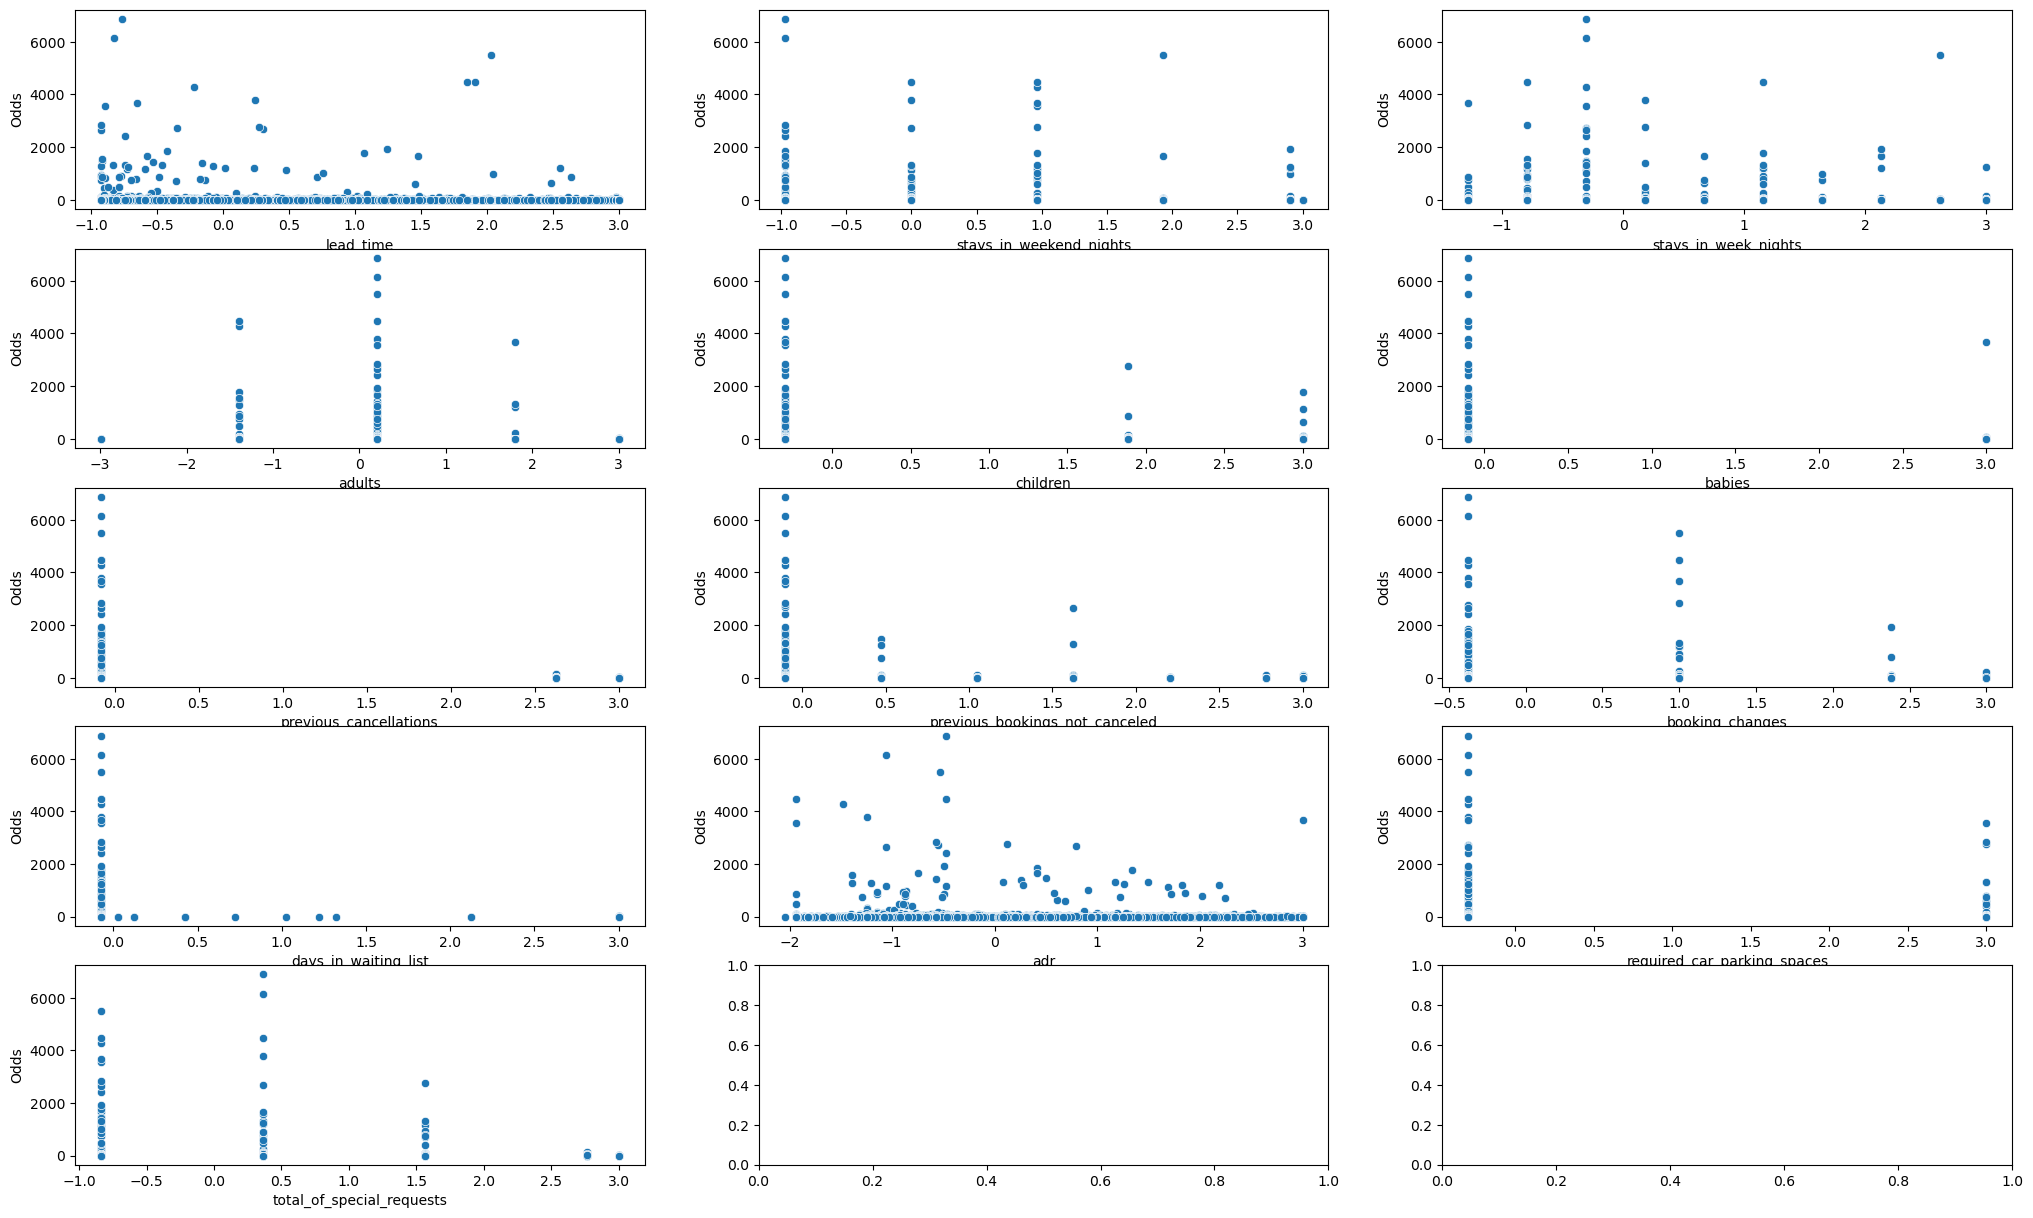

In [1112]:
fig,ax = plt.subplots(5,3,figsize=(25,15))
for i,subplot in zip(list(outliers_free_data.columns),ax.flatten()):
    sns.scatterplot(outliers_free_data[i],log_reg_predict_proba_df['Odds'],ax=subplot)
    

### From the above plots we can see that the independent variables donot have a linear relation with the log(odds) of the target variable and hence this might be one reason why Logistic Regression isn't performing to it's optimal power

Automatically created module for IPython interactive environment


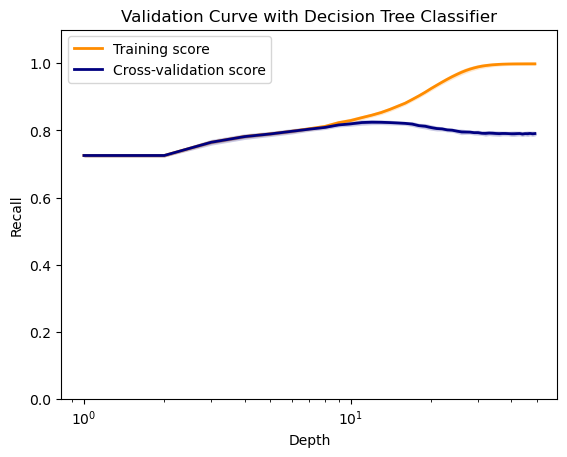

In [1092]:
print(__doc__)
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
param_range = np.arange(1,50)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), xtrain_exp_wo_res,ytrain_exp_wo_res, param_name="max_depth",scoring='ac',param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Depth")
plt.ylabel("Recall")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### DecisionTreeClassifier without pruning on the data where reservation_status has been dropped

In [1114]:
from sklearn.tree import DecisionTreeClassifier

In [1115]:
dt = DecisionTreeClassifier(random_state=69)

In [1116]:
exp_wo_res_dtmodel = dt.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)

In [1133]:
ypred_exp_wo_res_dtmodel = exp_wo_res_dtmodel.predict(xtest_exp_wo_res)

In [1134]:
print(classification_report(ytest_exp_wo_res,ypred_exp_wo_res_dtmodel))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     19011
           1       0.62      0.63      0.62      7208

    accuracy                           0.79     26219
   macro avg       0.74      0.74      0.74     26219
weighted avg       0.79      0.79      0.79     26219



In [1135]:
confusion_matrix(ytest_exp_wo_res,ypred_exp_wo_res_dtmodel)

array([[16231,  2780],
       [ 2693,  4515]], dtype=int64)

### Decision tree classifier is also giving me a fairly good result without pruning, so I am not going to prune it and instead go for ensemble techniques like Random Forest and other boosting techniques

## Random Forest Classifier without pruning

In [1127]:
from sklearn.ensemble import RandomForestClassifier

In [1130]:
rf = RandomForestClassifier(random_state=69)

In [1132]:
import time 
start_time = time.time()
rfmodel = rf.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)
end_time = time.time()
print(f'Time taken to execute this is {end_time-start_time} seconds')

Time taken to execute this is 17.864237546920776 seconds


In [1137]:
ypred_exp_wo_res_rfmodel = rfmodel.predict(xtest_exp_wo_res)

In [1138]:
print(classification_report(ytest_exp_wo_res,ypred_exp_wo_res_rfmodel))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     19011
           1       0.76      0.63      0.69      7208

    accuracy                           0.84     26219
   macro avg       0.81      0.78      0.79     26219
weighted avg       0.84      0.84      0.84     26219



### I am not going with pruning as my model is not overfit 

## Boosting Techniques : AdaBoost

In [1140]:
from sklearn.ensemble import AdaBoostClassifier

In [1146]:
abc = AdaBoostClassifier(random_state=69)

In [1147]:
start_time = time.time()
abcmodel = abc.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)
end_time = time.time()
print(f'Time taken to execute this is {end_time-start_time} seconds')

Time taken to execute this is 9.915600299835205 seconds


In [1148]:
ypred_exp_wo_res_abcmodel = abcmodel.predict(xtest_exp_wo_res)

In [1149]:
print(classification_report(ypred_exp_wo_res_abcmodel,ytest_exp_wo_res))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     20899
           1       0.53      0.71      0.61      5320

    accuracy                           0.81     26219
   macro avg       0.72      0.78      0.74     26219
weighted avg       0.84      0.81      0.82     26219



### GridSearchCV on random forest with pruning parameters

In [1151]:
from sklearn.model_selection import GridSearchCV

In [1153]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
param_grid = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10,20],
                     'max_depth': [10, 15],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 8],
                     'min_samples_leaf': [5, 9],
                     'max_leaf_nodes': [8, 11]}]

# Create a random forest model
rf = RandomForestClassifier()

# Perform a grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)

end_time = time.time()

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

print(f'Time taken to execute this is {end_time-start_time} seconds')

Best parameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 10}
Best score:  0.7709270332954683
Time taken to execute this is 552.1963794231415 seconds


In [1155]:
start_time = time.time()
rf_pruned = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 15,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 9,
                                  min_samples_split = 2,
                                  n_estimators = 10)

end_time = time.time()
print(f'Time taken to execute this is {end_time-start_time} seconds')

Time taken to execute this is 0.0 seconds


In [1156]:
start_time = time.time()
rf_GSCV_model = rf_pruned.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)
end_time = time.time()
print(f'Time taken to execute this is {end_time-start_time} seconds')


Time taken to execute this is 0.6568443775177002 seconds


In [1157]:
ypred_exp_wo_res_rf_GSCV_model = rf_GSCV_model.predict(xtest_exp_wo_res)

In [1158]:
print(classification_report(ypred_exp_wo_res_rf_GSCV_model,ytest_exp_wo_res))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     24824
           1       0.16      0.81      0.26      1395

    accuracy                           0.76     26219
   macro avg       0.57      0.78      0.56     26219
weighted avg       0.94      0.76      0.82     26219



### As expected ,though GridSeachCV gave us a decent enough accuracy, the f1-score of the 1 class is terrible and hence this model cannot be used

In [1161]:
rf_tuned = RandomForestClassifier(n_estimators = 200,
                                 oob_score=0.5,
                                 random_state=69)

In [1162]:
import time 
start_time = time.time()
rf_tunedmodel = rf_tuned.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)
end_time = time.time()
print(f'Time taken to execute this is {end_time-start_time} seconds')

Time taken to execute this is 50.14272117614746 seconds


In [1164]:
ypred_exp_wo_res_rf_tuned_model = rf_tunedmodel.predict(xtest_exp_wo_res)

In [1165]:
print(classification_report(ypred_exp_wo_res_rf_tuned_model,ytest_exp_wo_res))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     20229
           1       0.63      0.76      0.69      5990

    accuracy                           0.84     26219
   macro avg       0.78      0.82      0.79     26219
weighted avg       0.86      0.84      0.85     26219



### From the above Random Forest model we can see that increasing the number of estimators has not increased the performance of the model at all and since n_estimators = 200 is also computationally heavy, let us go with n_estimators = 100

## XGBoost

In [1170]:
from xgboost import XGBClassifier

In [1171]:
xgb = XGBClassifier()

In [1172]:
start_time = time.time()
xgbmodel = xgb.fit(xtrain_exp_wo_res,ytrain_exp_wo_res)
end_time = time.time()
print(f'Time taken for execution is {end_time-start_time} seconds')

Time taken for execution is 19.461905241012573 seconds


In [1173]:
ypred_xgb = xgbmodel.predict(xtest_exp_wo_res)

In [1175]:
print(classification_report(ypred_xgb,ytest_exp_wo_res))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     19806
           1       0.67      0.75      0.71      6413

    accuracy                           0.85     26219
   macro avg       0.79      0.82      0.80     26219
weighted avg       0.86      0.85      0.85     26219



### Finally we come to this conclusion that XGBoost classifier has given us the best result

### Though XGB has given us the best model in terms of accuracy, we are going to persist with logistic regression as it' accuracy is close to that of XGBClassifier and it also helps us determine which variables impact the target variable the most.This information can be useful for the hotel/resort as it can help make changes in those variables which impact the target variable

In [1207]:
print('Final models accuracy report')
print('')
print(classification_report(ypred_exp_wo_res,ytest_exp_wo_res))


Final models accuracy report

              precision    recall  f1-score   support

           0       0.92      0.87      0.90     20238
           1       0.63      0.76      0.69      5981

    accuracy                           0.84     26219
   macro avg       0.78      0.81      0.79     26219
weighted avg       0.86      0.84      0.85     26219



In [1210]:
coef_df.head()  ### ß coefs which help us explain the correlation between the predictors and the target variable

,ß
deposit_type_Non Refund,[3.6220122228709677]
reserved_room_type_G,[2.2445581017239884]
reserved_room_type_E,[1.7279957715244292]
reserved_room_type_F,[1.711856787081886]
previous_cancellations,[1.6455596038838292]
